# **FIT5196 Task 1 in Assessment 2**

Student Name: Anushka Jemima

Student ID: 33617457

Student Name: Shruthi Shashidhara Shastry

Student ID: 33684669

Date: 18-10-2024

Environment: Python




### **Overview for Task 1: Data Cleansing**:

The goal of Task 1 is to perform data cleansing on the provided dataset by identifying and rectifying three types of issues: errors, missing values, and outliers.

This task is crucial because unclean data can significantly affect the quality and accuracy of any subsequent data analysis or machine learning models.


In [643]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import necessary Libraries**:

This code imports key libraries for data analysis, statistical computation, and machine learning tasks.
-  Pandas and NumPy handle data manipulation and numerical operations, while Matplotlib and Seaborn are used for visualizations.
- SciPy supports statistical analysis, and Datetime processes date and time values. Math functions like radians, sin, and cos assist in geographical calculations (e.g., distance using the Haversine formula).
- AST and Literal_eval convert string representations into Python objects, and Itertools enables advanced looping.
- Lastly, Scikit-learn provides functions for building linear regression models, splitting data into training/testing sets, and evaluating models with metrics like R-squared.

In [644]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime
from math import radians, sin, cos, sqrt, asin
import ast
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from ast import literal_eval

# **1. Dirty Data**:

Loading the Data:

In [645]:
root_path = '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/student_data/Group103/'

In [646]:
dirty_df = pd.read_csv(f'{root_path}/Group103_dirty_data.csv')

In [647]:
dirty_df

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD441257,ID2672365503,2019-06-29,Bakers,"[('iStream', 1), ('Alcon 10', 1)]",9100,64.69,-37.809265,145.001445,10,8254.69,Winter,False,0.5525,five stars absolutely love this phone,True
1,ORD493134,ID3130999255,2019-01-13,Bakers,"[('Toshika 750', 2), ('pearTV', 2), ('Candle I...",23915,68.18,-37.814270,145.011127,5,22787.43,Summer,True,1.4766,not unlocked as advertised! says it's unlocked...,False
2,ORD039094,ID0591431033,2019-02-21,Nickolson,"[('Universe Note', 2), ('Toshika 750', 2), ('i...",24075,68.18,-37.817884,144.967848,0,24143.18,Summer,True,0.1694,NaN,True
3,ORD208432,ID1132053699,2019-03-21,Thompson,"[('Toshika 750', 2), ('iAssist Line', 1), ('iS...",11015,63.54,-37.817910,144.946206,25,8324.79,Spring,False,0.5879,three stars it's not a bad phone. it's functional,True
4,ORD271000,ID0373655802,2019-05-12,Thompson,"[('Lucent 330S', 1), ('iStream', 1), ('Univers...",6055,70.79,-37.812655,144.925244,25,4612.04,Autumn,False,1.9194,absolutely love it! i would highly recommend t...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD268760,ID3215192042,2019-02-25,Thompson,"[('Alcon 10', 2), ('Universe Note', 2)]",18760,88.35,-37.808744,144.948353,0,18848.35,Summer,True,0.4517,good need to get it set up,True
496,ORD314019,ID2207663839,2019-03-26,Thompson,"[('Lucent 330S', 1), ('Universe Note', 2), ('p...",20750,52.57,-37.800528,144.945841,25,4195.32,Autumn,False,1.3562,one star nothing works right and it has a mind...,False
497,ORD148347,ID2288769462,2019-11-22,Bakers,"[('Candle Inferno', 1), ('iStream', 1)]",580,64.37,-37.801905,145.003436,10,9735.32,Spring,False,1.1540,buy an alcon...from a 4 time note owner. excel...,False
498,ORD216712,ID0282825790,2019-03-06,Thompson,"[('Universe Note', 2), ('Olivia x460', 1), ('C...",8555,52.29,-37.802217,144.950799,25,6468.54,Autumn,False,1.2093,phone had a problem phone seemed great but con...,False


**Exploratory Data Analysis**:

In [648]:
print (dirty_df.shape)
dirty_df.head(10)

(500, 16)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD441257,ID2672365503,2019-06-29,Bakers,"[('iStream', 1), ('Alcon 10', 1)]",9100,64.69,-37.809265,145.001445,10,8254.69,Winter,False,0.5525,five stars absolutely love this phone,True
1,ORD493134,ID3130999255,2019-01-13,Bakers,"[('Toshika 750', 2), ('pearTV', 2), ('Candle I...",23915,68.18,-37.814270,145.011127,5,22787.43,Summer,True,1.4766,not unlocked as advertised! says it's unlocked...,False
2,ORD039094,ID0591431033,2019-02-21,Nickolson,"[('Universe Note', 2), ('Toshika 750', 2), ('i...",24075,68.18,-37.817884,144.967848,0,24143.18,Summer,True,0.1694,NaN,True
3,ORD208432,ID1132053699,2019-03-21,Thompson,"[('Toshika 750', 2), ('iAssist Line', 1), ('iS...",11015,63.54,-37.817910,144.946206,25,8324.79,Spring,False,0.5879,three stars it's not a bad phone. it's functional,True
4,ORD271000,ID0373655802,2019-05-12,Thompson,"[('Lucent 330S', 1), ('iStream', 1), ('Univers...",6055,70.79,-37.812655,144.925244,25,4612.04,Autumn,False,1.9194,absolutely love it! i would highly recommend t...,True
5,ORD079617,ID3804569172,2019-11-16,Bakers,"[('Lucent 330S', 2), ('Candle Inferno', 2), ('...",9630,105.32,-37.820230,144.989425,0,9735.32,Spring,False,1.2484,"very good quality ""refurbished"" phone! fast sh...",True
6,ORD350274,ID0122752579,2019-11-25,Thompson,"[('Thunder line', 2), ('Universe Note', 1), ('...",10335,100.65,-37.814123,144.939710,0,10435.65,Spring,False,0.6670,five stars great phone.,True
7,ORD325153,ID2717237172,2019-02-11,Nickolson,"[('Candle Inferno', 1), ('iAssist Line', 2)]",4880,107.41,-37.798829,144.969288,15,4255.41,Summer,False,2.2004,good product amazing product. works perfectly,True
8,ORD060821,ID0634777774,2019-01-17,Thompson,"[('pearTV', 2), ('Toshika 750', 2), ('Universe...",28160,72.55,-37.814846,144.937541,15,24008.55,Summer,False,0.8721,is this a stolen merchandize? nice phone with ...,True
9,ORD219114,ID2239389706,2019-03-21,Bakers,"[('Alcon 10', 1), ('Olivia x460', 1), ('iAssis...",12400,62.01,-37.815402,144.999766,10,11222.01,Autumn,True,1.3428,dead on arrival keeps saying battery disconnec...,False


In [649]:
dirty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

This output from dirty_df.info() shows that the dataset contains 500 entries and 16 columns. Most columns have no missing values, except for latest_customer_review, which has one missing value, and it lists the data types of each column, including objects, floats, integers, and booleans.

In [650]:
dirty_df.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,13290.440000,76.172860,-27.941475,135.096499,10.380000,12093.739880,1.057367
std,8256.904277,14.454886,41.354745,41.352907,8.354352,7436.542325,0.482487
min,580.000000,46.180000,-37.833683,-37.825992,0.000000,758.440000,0.071800
25%,7047.500000,65.887500,-37.816951,144.949153,5.000000,6467.590000,0.736100
50%,11810.000000,75.875000,-37.811525,144.963698,10.000000,10904.175000,1.024600
75%,18080.000000,82.557500,-37.805302,144.978822,15.000000,16792.170000,1.352750
max,39590.000000,110.850000,145.017145,145.015651,25.000000,36276.310000,2.761000


The dirty_df.describe() function provides summary statistics for the numerical columns. It shows metrics like mean, standard deviation, and min/max values, revealing potential outliers in customer_lat, customer_long, and delivery_charges with extreme values.

In [651]:
for col in dirty_df.select_dtypes(include=['object']).columns:
    print(f"Distribution for {col}:")
    print(dirty_df[col].value_counts())
    print()

Distribution for order_id:
order_id
ORD441257    1
ORD463738    1
ORD312549    1
ORD272538    1
ORD117120    1
            ..
ORD279381    1
ORD385933    1
ORD025871    1
ORD316891    1
ORD186799    1
Name: count, Length: 500, dtype: int64

Distribution for customer_id:
customer_id
ID0991978006    2
ID2207663839    2
ID0589708326    2
ID0579498247    2
ID1865096363    2
               ..
ID0129279537    1
ID0289602599    1
ID0282845971    1
ID6167441075    1
ID0130040449    1
Name: count, Length: 493, dtype: int64

Distribution for date:
date
2019-06-23    6
2019-06-26    5
2019-08-01    5
2019-04-23    5
2019-10-10    5
             ..
2019-05-13    1
2019-31-01    1
2019-15-09    1
2019-05-16    1
2019-03-26    1
Name: count, Length: 290, dtype: int64

Distribution for nearest_warehouse:
nearest_warehouse
Thompson     197
Nickolson    172
Bakers       108
thompson       9
nickolson      8
bakers         6
Name: count, dtype: int64

Distribution for shopping_cart:
shopping_cart
[('Can

Interpretation:

The distribution for order_id and customer_id shows that all orders are unique, while a few customers made multiple purchases. The date column reveals most transactions happened in 2019, with some variations in frequency. For nearest_warehouse, the most frequent locations are Thompson and Nickolson, with minor inconsistencies in spelling (e.g., lowercase entries like "thompson"). The shopping_cart column reveals diverse product combinations, with a few repeat patterns. The season column is well-distributed across all seasons with some inconsistencies. Finally, the latest_customer_review entries show various feedback, indicating varying levels of customer satisfaction

In [652]:
dirty_df.reset_index(inplace=True)

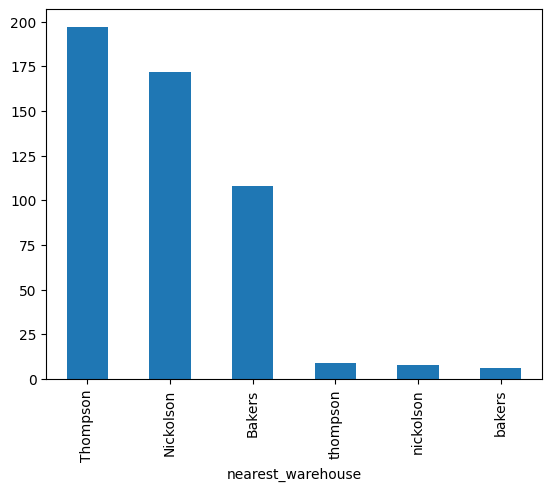

In [653]:
dirty_df['nearest_warehouse'].value_counts().plot(kind='bar')
plt.show()


Nearest Warehouse Bar Plot: The bar plot shows the distribution of customer orders across different warehouses. Thompson has the highest number of orders, followed by Nickolson and Bakers. The plot also highlights inconsistencies in warehouse names, with lowercase variants like "thompson" and "bakers" present.

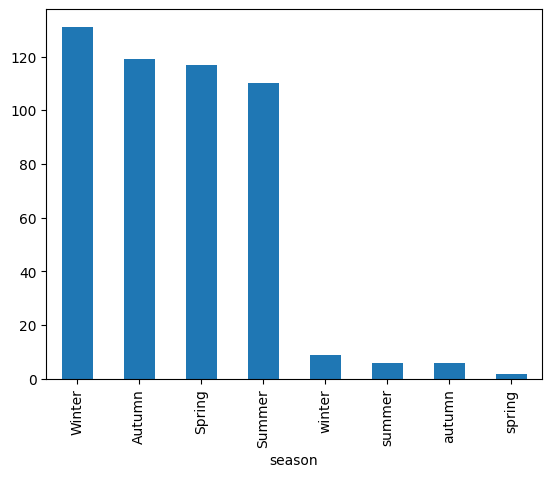

In [654]:
dirty_df['season'].value_counts().plot(kind='bar')
plt.show()


Season Bar Plot: This bar plot shows the number of orders across different seasons. Winter, Autumn, and Spring have the highest order counts, while lowercase season names (e.g., "winter", "summer") indicate inconsistent data formatting

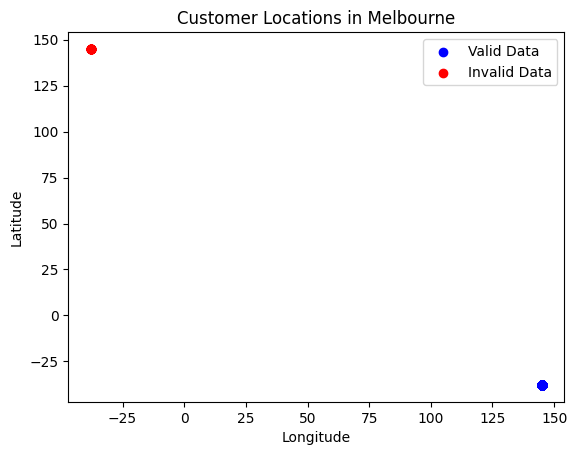

In [655]:
# Melbourne's latitude and longitude boundaries
lat_min, lat_max = -38.433859, -37.511273
long_min, long_max = 144.593741, 145.512528

dirty_df_geo = dirty_df.copy()
# Filter valid and invalid data
valid_data = dirty_df_geo[(dirty_df_geo['customer_lat'].between(lat_min, lat_max)) &
                      (dirty_df_geo['customer_long'].between(long_min, long_max))]
invalid_data = dirty_df_geo[~(dirty_df_geo['customer_lat'].between(lat_min, lat_max)) |
                        ~(dirty_df_geo['customer_long'].between(long_min, long_max))]

# Plot valid and invalid data
plt.scatter(valid_data['customer_long'], valid_data['customer_lat'], color='blue', label='Valid Data')
plt.scatter(invalid_data['customer_long'], invalid_data['customer_lat'], color='red', label='Invalid Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Customer Locations in Melbourne')
plt.legend()
plt.show()


Customer Location Validation: The scatter plot displays valid and invalid customer latitude and longitude values in Melbourne. Blue dots represent valid locations, while the red dots represent invalid ones. The plot highlights outliers far outside the expected range, which need correction.



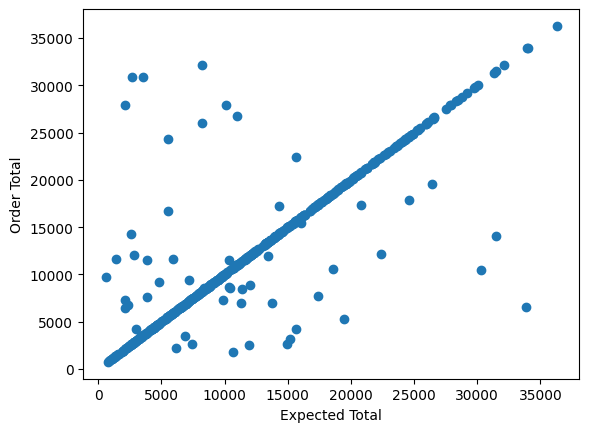

In [656]:
dirty_df_charge = dirty_df.copy()
dirty_df_charge['expected_total'] = dirty_df_charge['order_price'] * (1 - dirty_df_charge['coupon_discount'] / 100) + dirty_df_charge['delivery_charges']
inconsistent_totals = dirty_df_charge[dirty_df_charge['expected_total'] != dirty_df_charge['order_total']]

plt.scatter(dirty_df_charge['expected_total'], dirty_df_charge['order_total'])
plt.xlabel('Expected Total')
plt.ylabel('Order Total')
plt.show()


Order Total vs Expected Total Scatter Plot: The scatter plot compares the actual order total and the calculated expected total (considering price, discount, and delivery charges). Most points align along the diagonal line, indicating consistency, but some points deviate, representing errors in the order total calculation

# **1.1. Date dirty data :**

The date should be in yyyy-mm-dd format lets check if there is any inconsistencies in the date format:

### **1.1.1 Check for anomaly**

In [657]:

#This function checks if the date is in a given format
def is_valid_date(date_string, format):

    try:
        datetime.strptime(date_string, format)
        return True
    except ValueError:
        return False

#This function finds the correct and incorrect date formats
def check_date_format(df, date_column):
    incorrect_format = []

    for index, row in df.iterrows():
        date = row[date_column]
        if isinstance(date, str):
          #Checks if the dat is in the yyyy-mm-dd format
            if is_valid_date(date, "%Y-%m-%d"):
                continue
            #Chceks if the date is in the yyyy-dd-mm format
            elif is_valid_date(date, "%Y-%d-%m"):
                incorrect_format.append((index, date))


    return incorrect_format


date_column = 'date'
results = check_date_format(dirty_df, date_column)

if results:
    print(f"Found {len(results)} date(s) potentially in yyyy-dd-mm format:")
    for index, date in results:
        print(f"Index {index}: {date}")
else:
    print("No dates found in yyyy-dd-mm format.")

Found 15 date(s) potentially in yyyy-dd-mm format:
Index 27: 2019-23-04
Index 49: 2019-14-08
Index 71: 2019-27-08
Index 121: 2019-27-05
Index 126: 2019-18-04
Index 188: 2019-28-04
Index 195: 2019-24-02
Index 207: 2019-17-11
Index 222: 2019-31-01
Index 228: 2019-15-09
Index 251: 2019-23-06
Index 408: 2019-26-08
Index 466: 2019-28-02
Index 475: 2019-27-01
Index 479: 2019-14-06


We have found few dates in the wrong format lets fix it as shown below :

### **1.1.2 Fix anomaly**

In [658]:


#Chceks if date is in required format
def is_valid_date(date_string, format):
    try:
        datetime.strptime(date_string, format)
        return True
    except ValueError:
        return False

#Thiis function corrects the date format from yyyy-dd-mm to yyyy-mm-dd
def correct_date_format(date_string):
    try:
        corrected_date = datetime.strptime(date_string, "%Y-%d-%m").strftime("%Y-%m-%d")
        return corrected_date
    except ValueError:
        return date_string
#This function checks the dates in a dataset
def check_and_correct_dates(df, date_column):
    for index, row in df.iterrows():
        date = row[date_column]
        if isinstance(date, str):
            #Chcek if the date is in the correct format
            if is_valid_date(date, "%Y-%m-%d"):
                continue
            #Correct the date format
            elif is_valid_date(date, "%Y-%d-%m"):
                corrected_date = correct_date_format(date)
                df.at[index, date_column] = corrected_date


date_column = 'date'
check_and_correct_dates(dirty_df, date_column)

In [659]:


#We run these codes to check if the date column has been updated correctly
#This function checks the date format
def is_valid_date(date_string, format):
    try:
        datetime.strptime(date_string, format)
        return True
    except ValueError:
        return False
#This function finds inconsistencies in the date column
def check_date_format(df, date_column):
    incorrect_format = []

    for index, row in df.iterrows():
        date = row[date_column]
        if isinstance(date, str):
            if is_valid_date(date, "%Y-%m-%d"):
                continue
            elif is_valid_date(date, "%Y-%d-%m"):
                incorrect_format.append((index, date))


    return incorrect_format


date_column = 'date'
results = check_date_format(dirty_df, date_column)

if results:
    print(f"Found {len(results)} date(s) potentially in yyyy-dd-mm format:")
    for index, date in results:
        print(f"Index {index}: {date}")
else:
    print("No dates found in yyyy-dd-mm format.")

No dates found in yyyy-dd-mm format.


For the date column we know that we want our data in the yyyy-mm-dd format, hence we use a function to check if dates have yyyy-mm-dd format to check if the month value stays within 1-12 , we check which dates are in the format yyy-dd-mm and mark those as incorrect rows , we then update these rows to the correct format.

### **1.2 Season Dirty Data**

There is inconsistencies in the season name as seen from bar plot and value_counts lets correct that and see if there is any other anomaly.:

In [660]:
#Check distribution of season across the data set
dirty_df['season'].value_counts()

,count
season,
Winter,131
Autumn,119
Spring,117
Summer,110
winter,9
summer,6
autumn,6
spring,2


In [661]:
#Map the season
season_mapping = {
    'winter': 'Winter',
    'autumn': 'Autumn',
     'spring': 'Spring',
    'summer': 'Summer'
}
#Store lower case values
lowercase_season_indices = dirty_df[dirty_df['season'].isin(['winter', 'summer', 'autumn', 'spring'])].index

# Store the indices in a list for future reference
lowercase_season_indices_list = lowercase_season_indices.tolist()


# Replace the old titles with the new titles using the map function
dirty_df['season'] = dirty_df['season'].replace(season_mapping)
print(lowercase_season_indices)

Index([ 13,  29,  47,  73, 102, 119, 120, 135, 165, 166, 179, 202, 217, 223,
       224, 233, 242, 259, 293, 379, 411, 454, 461],
      dtype='int64')


In [662]:
#Chcek if the data has been updated
dirty_df['season'].value_counts()

,count
season,
Winter,140
Autumn,125
Spring,119
Summer,116


### **1.2.1  Check for anomaly**

In [663]:
# Define the mapping of months to seasons
#http://www.bom.gov.au/
season_months = {
    'Summer': [12, 1, 2],  # December, January, February
    'Autumn': [3, 4, 5],   # March, April, May
    'Winter': [6, 7, 8],   # June, July, August
    'Spring': [9, 10, 11]  # September, October, November
}

#This function takes the dataframe , the date column and season column to check if the months match
def check_season_date(df, date_column, season_column):

    invalid_rows = []
    #loop through each row
    for index, row in df.iterrows():
       #Store the date
        date_str = row[date_column]
        #Chcek if the date is in the format yyyy-mm-dd
        if isinstance(date_str, str) and '-' in date_str:
            # Extract the month from the date string in 'yyyy-mm-dd' format
            month = int(date_str.split('-')[1])
            season = row[season_column]

            # Check if the month matches the reported season
            if season in season_months and month not in season_months[season]:
                invalid_rows.append({
                    'index': index,
                    'order_id': row['order_id'],
                    'date': date_str,
                    'season': season,
                    'month': month
                })

    return invalid_rows


invalid_season_date_combinations = check_season_date(dirty_df, 'date', 'season')

#Chcek for anomaly in the date column
if invalid_season_date_combinations:
    print(f"Found {len(invalid_season_date_combinations)} rows with invalid season-date combinations:")
    for anomaly in invalid_season_date_combinations:
        print(anomaly)
else:
    print("No invalid season-date combinations found.")


Found 19 rows with invalid season-date combinations:
{'index': 3, 'order_id': 'ORD208432', 'date': '2019-03-21', 'season': 'Spring', 'month': 3}
{'index': 13, 'order_id': 'ORD223250', 'date': '2019-11-30', 'season': 'Winter', 'month': 11}
{'index': 29, 'order_id': 'ORD085779', 'date': '2019-09-14', 'season': 'Summer', 'month': 9}
{'index': 47, 'order_id': 'ORD032412', 'date': '2019-10-03', 'season': 'Autumn', 'month': 10}
{'index': 55, 'order_id': 'ORD075753', 'date': '2019-05-23', 'season': 'Spring', 'month': 5}
{'index': 73, 'order_id': 'ORD302039', 'date': '2019-06-05', 'season': 'Summer', 'month': 6}
{'index': 102, 'order_id': 'ORD382645', 'date': '2019-12-17', 'season': 'Autumn', 'month': 12}
{'index': 119, 'order_id': 'ORD273463', 'date': '2019-01-30', 'season': 'Spring', 'month': 1}
{'index': 165, 'order_id': 'ORD023465', 'date': '2019-10-04', 'season': 'Autumn', 'month': 10}
{'index': 166, 'order_id': 'ORD044853', 'date': '2019-08-29', 'season': 'Summer', 'month': 8}
{'index': 

### **1.2.2 Fix Anomaly**

In [664]:
# Mapping months to correct seasons
month_to_season = {
    12: 'Summer', 1: 'Summer', 2: 'Summer',  # December, January, February
    3: 'Autumn', 4: 'Autumn', 5: 'Autumn',   # March, April, May
    6: 'Winter', 7: 'Winter', 8: 'Winter',   # June, July, August
    9: 'Spring', 10: 'Spring', 11: 'Spring'  # September, October, November
}

# Function to correct the season based on the month
def correct_season(df, date_column, season_column):
    #Loop through each row
    for index, row in df.iterrows():
      #Extract date
        date_str = row[date_column]
        if isinstance(date_str, str) and '-' in date_str:
            #Extract month
            month = int(date_str.split('-')[1])
            correct_season = month_to_season.get(month)

            # Chcek for a season match
            if row[season_column] != correct_season:
                print(f"Correcting season for order_id {row['order_id']} from {row[season_column]} to {correct_season}")
                df.at[index, season_column] = correct_season


correct_season(dirty_df, 'date', 'season')


invalid_season_date_combinations_after_correction = check_season_date(dirty_df, 'date', 'season')

if not invalid_season_date_combinations_after_correction:
    print("All season-date combinations have been corrected.")
else:
    print(f"Found {len(invalid_season_date_combinations_after_correction)} rows with invalid season-date combinations after correction:")
    for anomaly in invalid_season_date_combinations_after_correction:
        print(anomaly)


Correcting season for order_id ORD208432 from Spring to Autumn
Correcting season for order_id ORD223250 from Winter to Spring
Correcting season for order_id ORD085779 from Summer to Spring
Correcting season for order_id ORD032412 from Autumn to Spring
Correcting season for order_id ORD075753 from Spring to Autumn
Correcting season for order_id ORD302039 from Summer to Winter
Correcting season for order_id ORD382645 from Autumn to Summer
Correcting season for order_id ORD273463 from Spring to Summer
Correcting season for order_id ORD023465 from Autumn to Spring
Correcting season for order_id ORD044853 from Summer to Winter
Correcting season for order_id ORD437055 from Winter to Autumn
Correcting season for order_id ORD304003 from Summer to Winter
Correcting season for order_id ORD130747 from Winter to Spring
Correcting season for order_id ORD030511 from Winter to Summer
Correcting season for order_id ORD268653 from Autumn to Spring
Correcting season for order_id ORD263811 from Winter to

## **1.3 Nearest Warehouse:**

Fixing the naming inconsistencies present in the nearest_warehouse which was seen in bar plot and value_counts.


In [665]:
dirty_df['nearest_warehouse'].value_counts()

,count
nearest_warehouse,
Thompson,197
Nickolson,172
Bakers,108
thompson,9
nickolson,8
bakers,6


In [666]:
#Define the correct mapping for the warehouses
warehouse_mapping = {
    'thompson': 'Thompson',
    'nickolson': 'Nickolson',
     'bakers': 'Bakers',}
#Store the index
lowercase_warehouse_indices = dirty_df[dirty_df['nearest_warehouse'].isin(['thompson', 'nickolson', 'bakers'])].index

#Store the indices in a list for future reference
lowercase_warehouse_indices_list = lowercase_warehouse_indices.tolist()
#Update the data set
dirty_df['nearest_warehouse'] = dirty_df['nearest_warehouse'].replace(warehouse_mapping)
print(lowercase_warehouse_indices_list)

[15, 16, 38, 59, 66, 75, 101, 109, 114, 143, 151, 169, 176, 210, 258, 300, 324, 332, 340, 381, 416, 432, 489]


In [667]:
#Chcek if dataset has been updated
dirty_df['nearest_warehouse'].value_counts()

,count
nearest_warehouse,
Thompson,206
Nickolson,180
Bakers,114


# **1.4 Lattitude and Longitude Dirty Data**

The season column we intially use value counts since we know it is a categorical variable and want to find the values this column has , through this we identify that some values are captialized whereas others are in lower case , hence before further checks we transform all the columns to capitalized to have a standard data format, we then check for the match between date and season, we want to check if the season assigned falls within the month that is extracted from the date column based on a predfine season month match obtained from http://www.bom.gov.au
Through this we correct incorrect season values.

### **1.4.1 Check for Anomaly**

In [668]:
# Define the valid range for latitude and longitude in Melbourne, Australia
min_lat, max_lat = -38, -37
min_long, max_long = 144, 146

# Function to check if latitude and longitude are within the valid range
def check_lat_long_ranges(df, lat_column, long_column):
    invalid_rows = df[
        (df[lat_column] < min_lat) | (df[lat_column] > max_lat) |
        (df[long_column] < min_long) | (df[long_column] > max_long)
    ]
    return invalid_rows

# Check for invalid lat/long values
invalid_lat_long = check_lat_long_ranges(dirty_df, 'customer_lat', 'customer_long')

# Display the rows with invalid latitude or longitude
if not invalid_lat_long.empty:
    print(f"Found {len(invalid_lat_long)} rows with invalid latitude or longitude values:")
    print(invalid_lat_long[['order_id', 'customer_lat', 'customer_long']])
else:
    print("No invalid latitude or longitude values found.")


Found 27 rows with invalid latitude or longitude values:
      order_id  customer_lat  customer_long
12   ORD311767    145.005034     -37.811770
36   ORD364796    144.977713     -37.810584
52   ORD383094    144.976720     -37.821000
60   ORD452513    145.014074     -37.810810
86   ORD432689    144.943292     -37.823658
94   ORD028679    144.970380     -37.819722
97   ORD327833    144.944983     -37.806877
99   ORD015925    144.978502     -37.808494
140  ORD403736    144.958205     -37.815806
172  ORD024884    144.994293     -37.802684
191  ORD160155    144.935994     -37.814048
206  ORD356733    144.986072     -37.817098
256  ORD029222    145.000787     -37.818662
270  ORD355729    144.954919     -37.821195
274  ORD395842    145.002060     -37.800735
312  ORD047878    145.008356     -37.818883
346  ORD209919    144.998829     -37.811780
377  ORD441816    144.921217     -37.808324
388  ORD406058    144.990906     -37.818508
417  ORD223587    144.967304     -37.814134
448  ORD294248    1

In [669]:
EARTH_RADIUS_KM = 6378
#Read warehouse data
warehouse_df = pd.read_csv('/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/warehouses.csv')
#Transform to an easy to access format
warehouse_coordinates = warehouse_df.set_index('names')[['lat', 'lon']].T.to_dict()

#Haversine formula to calculate the distance between two points
def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    return c * EARTH_RADIUS_KM


def swap_and_compute_distance(row):
    # Get the correct warehouse coordinates
    warehouse_lat = warehouse_coordinates[row['nearest_warehouse']]['lat']
    warehouse_lon = warehouse_coordinates[row['nearest_warehouse']]['lon']
    # Swap lat and lon
    swapped_lat = row['customer_long']
    swapped_lon = row['customer_lat']
    #Calculate the distance after swapping the lat and long
    swapped_distance = haversine(swapped_lon, swapped_lat, warehouse_lon, warehouse_lat)

    return round(swapped_distance, 4)

#Melbourne
MIN_LAT_MELBOURNE = -38
MAX_LAT_MELBOURNE = -37
MIN_LONG_MELBOURNE = 144
MAX_LONG_MELBOURNE = 145

#Store the incorrect data
incorrect_lat_lon_rows = dirty_df[
    (dirty_df['customer_lat'] < MIN_LAT_MELBOURNE) | (dirty_df['customer_lat'] > MAX_LAT_MELBOURNE) |
    (dirty_df['customer_long'] < MIN_LONG_MELBOURNE) | (dirty_df['customer_long'] > MAX_LONG_MELBOURNE)
]


incorrect_lat_lon_rows['swapped_distance_to_warehouse'] = incorrect_lat_lon_rows.apply(swap_and_compute_distance, axis=1)

#Calculate the differnece in the distance obtained after swapping lat and long
incorrect_lat_lon_rows['distance_difference'] = abs(incorrect_lat_lon_rows['swapped_distance_to_warehouse'] - incorrect_lat_lon_rows['distance_to_nearest_warehouse'])
#Chcek for rows that have a big differnece more than the threshold of 0.1
significant_discrepancies = incorrect_lat_lon_rows[incorrect_lat_lon_rows['distance_difference'] < 0.1]


print(significant_discrepancies[['order_id', 'customer_lat', 'customer_long', 'nearest_warehouse', 'distance_to_nearest_warehouse', 'swapped_distance_to_warehouse', 'distance_difference']])


      order_id  customer_lat  customer_long nearest_warehouse  \
12   ORD311767    145.005034     -37.811770            Bakers   
36   ORD364796    144.977713     -37.810584         Nickolson   
52   ORD383094    144.976720     -37.821000         Nickolson   
60   ORD452513    145.014074     -37.810810            Bakers   
86   ORD432689    144.943292     -37.823658          Thompson   
94   ORD028679    144.970380     -37.819722         Nickolson   
97   ORD327833    144.944983     -37.806877          Thompson   
99   ORD015925    144.978502     -37.808494         Nickolson   
140  ORD403736    144.958205     -37.815806          Thompson   
172  ORD024884    144.994293     -37.802684            Bakers   
191  ORD160155    144.935994     -37.814048          Thompson   
206  ORD356733    144.986072     -37.817098            Bakers   
256  ORD029222    145.000787     -37.818662            Bakers   
270  ORD355729    144.954919     -37.821195          Thompson   
274  ORD395842    145.002

<ipython-input-669-49b855c2c22a>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_lat_lon_rows['swapped_distance_to_warehouse'] = incorrect_lat_lon_rows.apply(swap_and_compute_distance, axis=1)
<ipython-input-669-49b855c2c22a>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_lat_lon_rows['distance_difference'] = abs(incorrect_lat_lon_rows['swapped_distance_to_warehouse'] - incorrect_lat_lon_rows['distance_to_nearest_warehouse'])


### **1.4.2 Fix Anomaly**

In [670]:
min_lat, max_lat = -38, -37
min_long, max_long = 144, 146
# Function to swap latitude and longitude values where they are outside the valid range
def swap_lat_long(df, lat_column, long_column):
    # Swap the latitude and longitude for rows where they fall outside the valid range
    df.loc[(df[lat_column] >= min_long) & (df[long_column] <= max_lat), [lat_column, long_column]] = df.loc[
        (df[lat_column] >= min_long) & (df[long_column] <= max_lat), [long_column, lat_column]].values
    return df

# Apply the swap function
dirty_df = swap_lat_long(dirty_df, 'customer_lat', 'customer_long')

# Verify the changes by checking if there are still any invalid latitude/longitude values
invalid_lat_long_after_swap = check_lat_long_ranges(dirty_df, 'customer_lat', 'customer_long')

if not invalid_lat_long_after_swap.empty:
    print(f"Found {len(invalid_lat_long_after_swap)} rows with invalid latitude or longitude values after swapping:")
    print(invalid_lat_long_after_swap[['order_id', 'customer_lat', 'customer_long']])
else:
    print("No invalid latitude or longitude values found after swapping.")

No invalid latitude or longitude values found after swapping.


Given that the shipping takes place only within melbourne we firat identify an anomaly in the customer_lat and customer_long when we check the describe function max and min value for these columns , to further explore the rows we define the lat and long for melbourne and check if our data falls within this boundary, on exploring the data we can see that the lattitude values tend to be very high while longitude are lower than usual and we attempt to swap these columns, to verify if our fix is accurate we leverage the one anomaly per row rule , if there is an anomaly in lat and long fields the distance calculated would be accurate , hence we calculate the distance after swapping lat and long and check if there is differnece between calculated distance and given distnace chceking for recaords that beat a threshold of 0.1 for the distance differnce, on verifying we apply the fix to our original data frame.

# **1.5  Nearest Warehouse**

Lets check if any other anomaly is present in nearest warehouse as below:



### **1.5.1 Check for Anomaly**

In [671]:


# Constants
EARTH_RADIUS_KM = 6378

# Load warehouse data
warehouse_df = pd.read_csv('/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/warehouses.csv')

# Convert warehouse data to a dictionary
warehouse_coordinates = warehouse_df.set_index('names')[['lat', 'lon']].T.to_dict()

# Haversine formula to calculate the distance between two points on Earth
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    return c * EARTH_RADIUS_KM

# Function to calculate the nearest warehouse and its distance
def calculate_nearest_warehouse(row):
    customer_lat = row['customer_lat']
    customer_long = row['customer_long']

    # Initialize variables to track the nearest warehouse
    nearest_warehouse = None
    min_distance = float('inf')

    # Iterate over all warehouses to calculate the distance
    for warehouse, coords in warehouse_coordinates.items():
        warehouse_lat = coords['lat']
        warehouse_lon = coords['lon']
        distance = haversine(customer_long, customer_lat, warehouse_lon, warehouse_lat)

        # Update if a closer warehouse is found
        if distance < min_distance:
            min_distance = distance
            nearest_warehouse = warehouse

    return nearest_warehouse, round(min_distance, 4)

temp_df = dirty_df.copy()

# Apply the function to calculate the nearest warehouse for each row
temp_df[['calculated_nearest_warehouse', 'calculated_distance_to_warehouse']] = temp_df.apply(
    lambda row: pd.Series(calculate_nearest_warehouse(row)), axis=1
)

# Compare the calculated nearest warehouse with the original warehouse in the dataset
temp_df['warehouse_mismatch'] = temp_df['nearest_warehouse'] != temp_df['calculated_nearest_warehouse']

# Filter for rows where the calculated warehouse does not match the original one
mismatches = temp_df[temp_df['warehouse_mismatch']]

# Show relevant columns including the original and calculated distances
result = mismatches[['order_id', 'customer_lat', 'customer_long', 'nearest_warehouse',
                     'calculated_nearest_warehouse', 'distance_to_nearest_warehouse',
                     'calculated_distance_to_warehouse']]


print(result)


      order_id  customer_lat  customer_long nearest_warehouse  \
15   ORD112491    -37.821656     145.002561         Nickolson   
16   ORD139055    -37.801589     144.962194         Nickolson   
38   ORD058650    -37.806354     144.958015         Nickolson   
66   ORD159210    -37.803204     144.960678         Nickolson   
75   ORD302331    -37.817489     144.967633            Bakers   
109  ORD309182    -37.804917     144.975593          Thompson   
114  ORD318170    -37.817826     144.992328          Thompson   
128  ORD456302    -37.804193     144.958600            Bakers   
143  ORD217950    -37.818078     144.966135          Thompson   
151  ORD331693    -37.803393     144.949220            Bakers   
169  ORD486723    -37.816164     145.009942         Nickolson   
176  ORD354055    -37.821883     144.955557         Nickolson   
210  ORD230733    -37.808870     145.015556          Thompson   
258  ORD201694    -37.802160     144.966623          Thompson   
300  ORD379442    -37.818

### **1.5.2 Fix Anomaly**

In [672]:
def correct_warehouse_mismatch(df):

    # Iterate through each row and replace the nearest_warehouse if incorrect
    for index, row in df.iterrows():
        customer_lat = row['customer_lat']
        customer_long = row['customer_long']

        # Initialize variables to track the nearest warehouse
        nearest_warehouse = None
        min_distance = float('inf')

        # Iterate over all warehouses to calculate the distance
        for warehouse, coords in warehouse_coordinates.items():
            warehouse_lat = coords['lat']
            warehouse_lon = coords['lon']
            distance = haversine(customer_long, customer_lat, warehouse_lon, warehouse_lat)

            # Update if a closer warehouse is found
            if distance < min_distance:
                min_distance = distance
                nearest_warehouse = warehouse

        # Check if the calculated nearest warehouse is different from the current one
        if row['nearest_warehouse'] != nearest_warehouse:
            # If mismatch, replace the original nearest_warehouse with the calculated one
            df.at[index, 'nearest_warehouse'] = nearest_warehouse

    return df

# Apply the correction function to the dirty_df dataframe
dirty_df = correct_warehouse_mismatch(dirty_df)

# Display the corrected dataframe (with no extra columns added)
print(dirty_df[['order_id', 'customer_lat', 'customer_long', 'nearest_warehouse', 'distance_to_nearest_warehouse']])


      order_id  customer_lat  customer_long nearest_warehouse  \
0    ORD441257    -37.809265     145.001445            Bakers   
1    ORD493134    -37.814270     145.011127            Bakers   
2    ORD039094    -37.817884     144.967848         Nickolson   
3    ORD208432    -37.817910     144.946206          Thompson   
4    ORD271000    -37.812655     144.925244          Thompson   
..         ...           ...            ...               ...   
495  ORD268760    -37.808744     144.948353          Thompson   
496  ORD314019    -37.800528     144.945841          Thompson   
497  ORD148347    -37.801905     145.003436            Bakers   
498  ORD216712    -37.802217     144.950799          Thompson   
499  ORD186799    -37.804668     144.935219          Thompson   

     distance_to_nearest_warehouse  
0                           0.5525  
1                           1.4766  
2                           0.1694  
3                           0.5879  
4                           1.9194

The column explored here is the Nearest Warehouse, we use value counts to first understand the categories that nearest warehouse has as a part of the EDA , through value counts we notice that there is a case difference betweeen the warehouse names, to bring the data to a standard format and correct the anomaly we replace the lower case values with a captialized value, we then check the accuracy of the nearest warehouse, given the lat and long of the warehouse and we know that shipping takes place from a customers nearest warehouse only , we use the customer_lat and customer_long to calculate the distance to all the warehouses and save the warehouse name that has the shortest distance,we then chcek if this calculated warehouse name is the same as the warehouse name in our data set , if there is a mismatch we replace the warehouse name with the warehouse that has the shortest distance to a customer.

# **1.6 Distance to Nearest Warehouse**

Lets check if the distance to nearest warehouse is actually the minimum distance from the customer's location to the warehouse mentioned:

### **1.6.1 Chcek for anomaly**

In [673]:


# Haversine formula to calculate the distance between two GPS points
def haversine(lat1, lon1, lat2, lon2):
    # Radius of Earth in kilometers
    R = 6378.0

    # Convert latitude and longitude from degrees to radians
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    # Differences in coordinates
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

warehouse_df = pd.read_csv('/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/warehouses.csv')
#Transform to an easy to access format
warehouses = warehouse_df.set_index('names')[['lat', 'lon']].T.to_dict()


# Function to check the distance between customer and warehouse locations
def check_distance_consistency(df, lat_column, long_column, warehouse_column, distance_column):
    deviations = []

    # Loop through each row in the dataframe
    for index, row in df.iterrows():
        warehouse = row[warehouse_column]
        if warehouse in warehouses:
            # Get warehouse coordinates
            warehouse_lat = warehouses[warehouse]['lat']
            warehouse_long = warehouses[warehouse]['lon']

            #Calculate distance
            calculated_distance = haversine(row[lat_column], row[long_column], warehouse_lat, warehouse_long)

            reported_distance = row[distance_column]
            #Check if the calculated values are close to the reported distance
            if not np.isclose(calculated_distance, reported_distance, atol=0.5):
                deviations.append({
                    'index': index,
                    'order_id': row['order_id'],
                    'warehouse': warehouse,
                    'calculated_distance': calculated_distance,
                    'reported_distance': reported_distance,
                    'lat': row[lat_column],
                    'long': row[long_column]
                })

    return deviations


distance_anomalies = check_distance_consistency(dirty_df, 'customer_lat', 'customer_long', 'nearest_warehouse', 'distance_to_nearest_warehouse')

if distance_anomalies:
    print(f"Found {len(distance_anomalies)} rows with distance inconsistencies:")
    for anomaly in distance_anomalies:
        print(anomaly)
else:
    print("No inconsistencies in distances to the nearest warehouse found.")


Found 13 rows with distance inconsistencies:
{'index': 9, 'order_id': 'ORD219114', 'warehouse': 'Bakers', 'calculated_distance': 0.7219382645206859, 'reported_distance': 1.3428, 'lat': -37.8154024, 'long': 144.9997664}
{'index': 34, 'order_id': 'ORD370151', 'warehouse': 'Thompson', 'calculated_distance': 1.6597576629192914, 'reported_distance': 0.8543, 'lat': -37.809067, 'long': 144.9287565}
{'index': 57, 'order_id': 'ORD292848', 'warehouse': 'Nickolson', 'calculated_distance': 1.6231914732281565, 'reported_distance': 0.9245, 'lat': -37.8242522, 'long': 144.98656469999997}
{'index': 104, 'order_id': 'ORD383986', 'warehouse': 'Nickolson', 'calculated_distance': 0.4710324565913539, 'reported_distance': 1.1329, 'lat': -37.8152542, 'long': 144.9662636}
{'index': 124, 'order_id': 'ORD401413', 'warehouse': 'Nickolson', 'calculated_distance': 0.41539362143693814, 'reported_distance': 1.6594, 'lat': -37.8183066, 'long': 144.96484130000005}
{'index': 134, 'order_id': 'ORD160236', 'warehouse': '

### **1.6.2 Fix Anomaly**

In [674]:
#This function updates the incorrect distance through the calulated distance between
def update_incorrect_distances(df, lat_column, long_column, warehouse_column, distance_column):
    for index, row in df.iterrows():
        warehouse = row[warehouse_column]
        if warehouse in warehouses:
            # Get warehouse coordinates
            warehouse_lat = warehouses[warehouse]['lat']
            warehouse_long = warehouses[warehouse]['lon']
            #Calculate the distance between the given shipping location and the nearest warehouse
            calculated_distance = haversine(row[lat_column], row[long_column], warehouse_lat, warehouse_long)
            df.at[index, distance_column] = calculated_distance

    return df


dirty_df = update_incorrect_distances(dirty_df, 'customer_lat', 'customer_long', 'nearest_warehouse', 'distance_to_nearest_warehouse')
distance_anomalies_after_update = check_distance_consistency(dirty_df, 'customer_lat', 'customer_long', 'nearest_warehouse', 'distance_to_nearest_warehouse')

if not distance_anomalies_after_update:
    print("All distance anomalies have been corrected.")
else:
    print(f"Found {len(distance_anomalies_after_update)} rows with distance inconsistencies after update:")
    for anomaly in distance_anomalies_after_update:
        print(anomaly)


All distance anomalies have been corrected.


To check if the distance from the customer lat and long to the nearest warehouse is correct we use the haversine formula since we know that there is only one anomaly per row and we have fixed the errors in the warehouse column and lat and long column we calculate distance to the nearest warehouse and compare it to our given diatnce , to check if the distance is accurate we use the isclose function from Numpy by setting an absolute differnece of 0.5, in order accept a distance as equal even if there is a differnece of 0,5 between the calculated and original distance.Through this we then fix anomaly in all the rows.

# **1.7 Shopping Cart Item**

### **1.7.1 Check for Anomaly**

In [675]:
#Reda the missing data
missing_data_dir = pd.read_csv(f'/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/student_data/Group103/Group103_missing_data.csv')
#Filter the DataFrame to select rows where order_price is not null
filtered_df = missing_data_dir[missing_data_dir['order_price'].notnull()]

# Select shopping_cart and order_price columns
selected_data = filtered_df[['shopping_cart', 'order_price']].copy()

# Convert the shopping_cart strings to actual lists of tuples
selected_data['shopping_cart'] = selected_data['shopping_cart'].apply(ast.literal_eval)


unique_items = set()
#Store the item names
for cart in selected_data['shopping_cart']:
    for item, _ in cart:
        unique_items.add(item)

items = sorted(list(unique_items))

# Create coefficients matrix
coeff_matrix = []
result_vector = []

for index, row in selected_data.iterrows():
    cart = row['shopping_cart']
    order_price = row['order_price']

    # Initialize a row for coefficients
    row_coeffs = [0] * len(items)
    for item, quantity in cart:
        row_coeffs[items.index(item)] = quantity  # Set quantity for the item

    coeff_matrix.append(row_coeffs)  # Add row to the coefficients matrix
    result_vector.append(order_price)  # Add order price to the result vector


unit_prices, residuals, rank, s = np.linalg.lstsq(np.array(coeff_matrix), np.array(result_vector), rcond=None)

# Return a dictionary of item names and their corresponding unit prices
unit_price_dict = dict(zip(items, unit_prices))

# Display the unit prices
print("Unit Prices:\n", unit_price_dict)


Unit Prices:
 {'Alcon 10': 8950.0, 'Candle Inferno': 429.99999999999727, 'Lucent 330S': 1229.9999999999955, 'Olivia x460': 1224.999999999999, 'Thunder line': 2179.9999999999964, 'Toshika 750': 4320.000000000002, 'Universe Note': 3449.999999999998, 'iAssist Line': 2224.9999999999977, 'iStream': 149.99999999999704, 'pearTV': 6310.0}


Using the missing data we know the order price and shopping cart for the non nulls rows are accurate so we use it to get the unit price, we use the numpy linalg library which follows the logic of solving a system of equations by forming matrices.

In [676]:
order_dity = dirty_df.copy()

# Convert the 'shopping_cart' strings to actual lists of tuples using ast.literal_eval
order_dity['shopping_cart'] = order_dity['shopping_cart'].apply(ast.literal_eval)

# Function to calculate the order price from the shopping cart
def calculate_order_price(cart, unit_prices):
    total_price = 0
    for item, quantity in cart:
        if item in unit_prices:
            total_price += unit_prices[item] * quantity
    return total_price

# Function to calculate the order total using the original order price, applying coupon discount, and adding delivery charges
def calculate_order_total_using_original_price(row):
    # Apply the coupon discount (percentage)
    discounted_price = row['order_price'] * (1 - (row['coupon_discount'] / 100))

    # Add delivery charges (no discount on delivery charges)
    total_price_with_delivery = discounted_price + row['delivery_charges']

    return round(total_price_with_delivery, 2)

# Calculate the order price based on the shopping cart and unit prices
order_dity['calculated_order_price'] = order_dity['shopping_cart'].apply(calculate_order_price, unit_prices=unit_price_dict)

# Use np.isclose
mismatch_data = order_dity[~np.isclose(order_dity['order_price'], order_dity['calculated_order_price'], atol=0.01)].copy()

# For the mismatched records, calculate the order total based on the original order price
mismatch_data['calculated_order_total'] = mismatch_data.apply(calculate_order_total_using_original_price, axis=1)

# Compare the calculated order total (using original order price) with the original order total
mismatch_data['order_total_mismatch'] = ~np.isclose(mismatch_data['order_total'], mismatch_data['calculated_order_total'], atol=0.01)

# Further filter to keep only those rows where order_total_mismatch is False
total_mismatch_data = mismatch_data[mismatch_data['order_total_mismatch'] == False]

# Display the filtered rows where both order price mismatch and order total mismatch exist
print(total_mismatch_data[['shopping_cart', 'order_price', 'calculated_order_price',
                           'order_total', 'calculated_order_total', 'order_total_mismatch']])
print(len(total_mismatch_data))


                                         shopping_cart  order_price  \
22   [(Universe Note, 1), (Thunder line, 2), (Olivi...         8820   
68             [(Lucent 330S, 1), (Candle Inferno, 1)]         4680   
100  [(Lucent 330S, 1), (Toshika 750, 2), (Candle I...        19560   
117  [(Toshika 750, 2), (iStream, 2), (Thunder line...        11165   
137  [(Candle Inferno, 2), (Thunder line, 1), (pear...        23925   
146  [(iAssist Line, 1), (Lucent 330S, 2), (Alcon 1...        12935   
163               [(Alcon 10, 2), (Candle Inferno, 2)]        22260   
203  [(Universe Note, 2), (Thunder line, 1), (Olivi...        20170   
205  [(pearTV, 2), (Universe Note, 2), (Thunder lin...        17280   
211                 [(Alcon 10, 1), (Thunder line, 1)]        10175   
212  [(Universe Note, 1), (iStream, 1), (Lucent 330...        12550   
263            [(iAssist Line, 1), (Universe Note, 2)]         7050   
265  [(Universe Note, 1), (Thunder line, 1), (Lucen...         7730   
281  [

Using the unit price and item dictionary we calculate the order price and check if it matches the original order price column , to further ensure the error lies only in the item of the shopping cart  we use the original order price to calculate the order total and check if the calculated order total is the same as the original order total and keep only records where there is no mismatch in the order total , this tells us that the error does lies in the items in the shopping cart and not the order price.

In [677]:
# Find records in dirty_df that have the same order price as the records in total_mismatch_data
matching_records = dirty_df[dirty_df['order_price'].isin(total_mismatch_data['order_price'])].copy()

# Remove records from matching_records where 'order_id' is the same as in total_mismatch_data
matching_records = matching_records[~matching_records['order_id'].isin(total_mismatch_data['order_id'])]

# Create a column to identify the source (Mismatch vs Matched record)
total_mismatch_data['source'] = 'Mismatched Record'
matching_records['source'] = 'Matched Record'

# Concatenate the mismatched records with the corresponding matching records from dirty_df
combined_data = pd.concat([total_mismatch_data, matching_records])

# Sort by order price for clarity
combined_data = combined_data.sort_values(by='order_price')

# Filter to get only the records where there is the same order_price but different order_ids
filtered_data = combined_data.groupby('order_price').filter(lambda x: x['order_id'].nunique() > 1)

data = filtered_data[['source', 'order_id', 'shopping_cart', 'order_price', 'order_total', 'calculated_order_total']]

<ipython-input-677-3c5e54166581>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_mismatch_data['source'] = 'Mismatched Record'


In [678]:
data

,source,order_id,shopping_cart,order_price,order_total,calculated_order_total
470,Mismatched Record,ORD215489,"[(Candle Inferno, 2), (Universe Note, 1)]",2085,1850.87,1850.87
411,Matched Record,ORD452753,"[('Olivia x460', 1), ('Candle Inferno', 2)]",2085,1643.90,NaN
464,Matched Record,ORD404813,"[('Universe Note', 2), ('iStream', 1)]",7050,6419.50,NaN
263,Mismatched Record,ORD417939,"[(iAssist Line, 1), (Universe Note, 2)]",7050,7114.40,7114.40
394,Matched Record,ORD159840,"[('Candle Inferno', 1), ('Alcon 10', 1)]",9380,7103.29,NaN
233,Matched Record,ORD268653,"[('Alcon 10', 1), ('Candle Inferno', 1)]",9380,8517.33,NaN
392,Mismatched Record,ORD164088,"[(Alcon 10, 1), (Thunder line, 1)]",9380,9454.07,9454.07
310,Matched Record,ORD164044,"[('Alcon 10', 2), ('Candle Inferno', 2)]",18760,16023.33,NaN
495,Mismatched Record,ORD268760,"[(Alcon 10, 2), (Universe Note, 2)]",18760,18848.35,18848.35
99,Matched Record,ORD015925,"[('Alcon 10', 2), ('Thunder line', 2)]",22260,16764.02,NaN


In order to verify our finding we search for records which have the same order price as the the records which we identified has wrong shopping cart items , through this we can see for the same order price the shopping carts are different.

In [679]:


# Initialize a new column 'new_shopping_cart' with None values
total_mismatch_data['new_shopping_cart'] = None

# Iterate through each row in total_mismatch_data to find the correct combination
for idx, row in total_mismatch_data.iterrows():
    shopping_cart = row['shopping_cart']
    correct_order_price = row['order_price']  # Original correct order price

    # Extract the quantities from the shopping cart
    shopping_cart_quantities = [quantity for _, quantity in shopping_cart]

    # Generate all possible combinations of items for the given number of items in the shopping cart
    possible_items = list(unit_price_dict.keys())
    combinations = list(itertools.permutations(possible_items, len(shopping_cart_quantities)))

    # Function to calculate the total price for a given combination of items and quantities
    def calculate_total_price(item_combination, quantities, unit_prices):
        total_price = 0
        for item, qty in zip(item_combination, quantities):
            total_price += unit_prices[item] * qty
        return total_price

    # Iterate over all possible combinations and check if the total price matches the correct order price
    matching_combination = None
    for combination in combinations:
        total_price = calculate_total_price(combination, shopping_cart_quantities, unit_price_dict)
        if abs(total_price - correct_order_price) < 0.01:
            matching_combination = combination
            break

    # If a matching combination is found, add it as a new column and convert to a string
    if matching_combination:
        combined_output = [(item, qty) for item, qty in zip(matching_combination, shopping_cart_quantities)]
        # Convert to a string
        new_shopping_cart_str = str(combined_output)
        # Update the 'new_shopping_cart' column for this row
        total_mismatch_data.at[idx, 'new_shopping_cart'] = new_shopping_cart_str
    else:
        total_mismatch_data.at[idx, 'new_shopping_cart'] = 'No matching combination found'

# Display the updated DataFrame with the new column
print(total_mismatch_data[['shopping_cart', 'order_price', 'new_shopping_cart']])


                                         shopping_cart  order_price  \
22   [(Universe Note, 1), (Thunder line, 2), (Olivi...         8820   
68             [(Lucent 330S, 1), (Candle Inferno, 1)]         4680   
100  [(Lucent 330S, 1), (Toshika 750, 2), (Candle I...        19560   
117  [(Toshika 750, 2), (iStream, 2), (Thunder line...        11165   
137  [(Candle Inferno, 2), (Thunder line, 1), (pear...        23925   
146  [(iAssist Line, 1), (Lucent 330S, 2), (Alcon 1...        12935   
163               [(Alcon 10, 2), (Candle Inferno, 2)]        22260   
203  [(Universe Note, 2), (Thunder line, 1), (Olivi...        20170   
205  [(pearTV, 2), (Universe Note, 2), (Thunder lin...        17280   
211                 [(Alcon 10, 1), (Thunder line, 1)]        10175   
212  [(Universe Note, 1), (iStream, 1), (Lucent 330...        12550   
263            [(iAssist Line, 1), (Universe Note, 2)]         7050   
265  [(Universe Note, 1), (Thunder line, 1), (Lucen...         7730   
281  [

<ipython-input-679-b41e4a37b2e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_mismatch_data['new_shopping_cart'] = None


We now have a list of the order items and we know the quantity of the shopping cart is acurate so we want to form differnet combinations of the item's with the same quantities, we store a list of the quatity of the items in a shopping cart and use itertools.permutations to get all possible combinantion of the item and quantity, then from these combinantions we calculate the order price to find which combination order price matches the original order price and we save that combination.

In [680]:


# Convert shopping_cart columns to string for comparison in both DataFrames
total_mismatch_data['new_shopping_cart_str'] = total_mismatch_data['new_shopping_cart'].astype(str)
data['shopping_cart_str'] = data['shopping_cart'].astype(str)

# Filter the 'data' DataFrame to only include rows where 'source' is 'Matched Record'
matched_records = data[data['source'] == 'Matched Record']

# Reverse the data index to ensure that inserting rows does not disrupt indexing
for idx, row in total_mismatch_data.iterrows():
    new_shopping_cart_str = row['new_shopping_cart_str']

    # Find if the new_shopping_cart exists in the filtered 'matched_records' DataFrame
    matching_rows = matched_records[matched_records['shopping_cart_str'] == new_shopping_cart_str]

    if not matching_rows.empty:
        # For each matching row, we find the index where it exists in the 'data' DataFrame
        for match_idx in matching_rows.index:
            # Create a new row with the 'new_shopping_cart' information
            new_row = pd.DataFrame([{
                'source': 'new_shopping_cart',
                'order_id': row['order_id'],  # You can add other information from total_mismatch_data if needed
                'shopping_cart': row['new_shopping_cart'],
                'order_price': row['order_price'],
                'order_total': row['order_total'],  # Assuming you want the original values
                'calculated_order_total': row['calculated_order_total']
            }])

            # Insert the new row into the 'data' DataFrame right after the matching index
            data = pd.concat([data.iloc[:match_idx + 1], new_row, data.iloc[match_idx + 1:]]).reset_index(drop=True)

# Drop the temporary columns used for string comparison
data = data.drop(columns=['shopping_cart_str'])
total_mismatch_data = total_mismatch_data.drop(columns=['new_shopping_cart_str'])

# Display the updated 'data' DataFrame
print(data)


<ipython-input-680-b1f3fe6a6d3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_mismatch_data['new_shopping_cart_str'] = total_mismatch_data['new_shopping_cart'].astype(str)
<ipython-input-680-b1f3fe6a6d3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['shopping_cart_str'] = data['shopping_cart'].astype(str)


               source   order_id  \
0   Mismatched Record  ORD215489   
1      Matched Record  ORD452753   
2      Matched Record  ORD404813   
3   Mismatched Record  ORD417939   
4      Matched Record  ORD159840   
5      Matched Record  ORD268653   
6   Mismatched Record  ORD164088   
7      Matched Record  ORD164044   
8   Mismatched Record  ORD268760   
9      Matched Record  ORD015925   
10  Mismatched Record  ORD212185   
11     Matched Record  ORD432374   
12     Matched Record  ORD091995   
13     Matched Record  ORD391016   
14  Mismatched Record  ORD282377   
15  new_shopping_cart  ORD212185   
16  new_shopping_cart  ORD164088   
17  new_shopping_cart  ORD268760   

                                        shopping_cart  order_price  \
0           [(Candle Inferno, 2), (Universe Note, 1)]         2085   
1         [('Olivia x460', 1), ('Candle Inferno', 2)]         2085   
2              [('Universe Note', 2), ('iStream', 1)]         7050   
3             [(iAssist Line, 1), (

In [681]:
data

,source,order_id,shopping_cart,order_price,order_total,calculated_order_total
0,Mismatched Record,ORD215489,"[(Candle Inferno, 2), (Universe Note, 1)]",2085,1850.87,1850.87
1,Matched Record,ORD452753,"[('Olivia x460', 1), ('Candle Inferno', 2)]",2085,1643.90,NaN
2,Matched Record,ORD404813,"[('Universe Note', 2), ('iStream', 1)]",7050,6419.50,NaN
3,Mismatched Record,ORD417939,"[(iAssist Line, 1), (Universe Note, 2)]",7050,7114.40,7114.40
4,Matched Record,ORD159840,"[('Candle Inferno', 1), ('Alcon 10', 1)]",9380,7103.29,NaN
5,Matched Record,ORD268653,"[('Alcon 10', 1), ('Candle Inferno', 1)]",9380,8517.33,NaN
6,Mismatched Record,ORD164088,"[(Alcon 10, 1), (Thunder line, 1)]",9380,9454.07,9454.07
7,Matched Record,ORD164044,"[('Alcon 10', 2), ('Candle Inferno', 2)]",18760,16023.33,NaN
8,Mismatched Record,ORD268760,"[(Alcon 10, 2), (Universe Note, 2)]",18760,18848.35,18848.35
9,Matched Record,ORD015925,"[('Alcon 10', 2), ('Thunder line', 2)]",22260,16764.02,NaN


Inorder to verify if our method is accurate we compare the newly formed combinantions with the correct combinations that we idntified from other records that have the same order price.

### **1.7.2 Fix Anomaly**

In [682]:



# Convert the 'shopping_cart' strings to actual lists of tuples using ast.literal_eval
dirty_df['shopping_cart'] = dirty_df['shopping_cart'].apply(ast.literal_eval)

# Function to calculate the order price from the shopping cart
def calculate_order_price(cart, unit_prices):
    total_price = 0
    for item, quantity in cart:
        if item in unit_prices:
            total_price += unit_prices[item] * quantity
    return total_price

# Function to calculate the order total using the original order price, applying coupon discount, and adding delivery charges
def calculate_order_total_using_original_price(row):
    discounted_price = row['order_price'] * (1 - (row['coupon_discount'] / 100))
    total_price_with_delivery = discounted_price + row['delivery_charges']
    return round(total_price_with_delivery, 2)

# Calculate the order price based on the shopping cart and unit prices
dirty_df['calculated_order_price'] = dirty_df['shopping_cart'].apply(calculate_order_price, unit_prices=unit_price_dict)

# Filter mismatched data where calculated price doesn't match
mismatch_data = dirty_df[~np.isclose(dirty_df['order_price'], dirty_df['calculated_order_price'], atol=0.01)].copy()

# For the mismatched records, calculate the order total based on the original order price
mismatch_data['calculated_order_total'] = mismatch_data.apply(calculate_order_total_using_original_price, axis=1)

# Compare the calculated order total (using original order price) with the original order total
mismatch_data['order_total_mismatch'] = ~np.isclose(mismatch_data['order_total'], mismatch_data['calculated_order_total'], atol=0.01)

# Keep only rows where the order total matches but the price doesn't
total_mismatch_data = mismatch_data[mismatch_data['order_total_mismatch'] == False]

# Drop the unnecessary columns from dirty_df
dirty_df = dirty_df.drop(columns=['calculated_order_price', 'calculated_order_total', 'order_total_mismatch'], errors='ignore')

# Initialize a new column 'new_shopping_cart' with None values
total_mismatch_data['new_shopping_cart'] = None

# Iterate through each row in total_mismatch_data to find the correct combination
for idx, row in total_mismatch_data.iterrows():
    shopping_cart = row['shopping_cart']
    correct_order_price = row['order_price']  # Original correct order price

    # Extract the quantities from the shopping cart
    shopping_cart_quantities = [quantity for _, quantity in shopping_cart]

    # Generate all possible combinations of items for the given number of items in the shopping cart
    possible_items = list(unit_price_dict.keys())
    combinations = list(itertools.permutations(possible_items, len(shopping_cart_quantities)))

    # Function to calculate the total price for a given combination of items and quantities
    def calculate_total_price(item_combination, quantities, unit_prices):
        total_price = 0
        for item, qty in zip(item_combination, quantities):
            total_price += unit_prices[item] * qty
        return total_price

    # Iterate over all possible combinations and check if the total price matches the correct order price
    matching_combination = None
    for combination in combinations:
        total_price = calculate_total_price(combination, shopping_cart_quantities, unit_price_dict)
        if abs(total_price - correct_order_price) < 0.01:  # Allow small tolerance for floating-point precision
            matching_combination = combination
            break

    # If a matching combination is found, update the original shopping_cart in dirty_df with this new combination
    if matching_combination:
        # Update the shopping_cart in dirty_df
        new_shopping_cart = [(item, qty) for item, qty in zip(matching_combination, shopping_cart_quantities)]
        dirty_df.at[idx, 'shopping_cart'] = new_shopping_cart
    else:
        # If no matching combination is found, you can leave the original shopping cart or add a placeholder
        dirty_df.at[idx, 'shopping_cart'] = 'No matching combination found'
dirty_df['shopping_cart'] = dirty_df['shopping_cart'].apply(str)
# Display the updated DataFrame with the corrected shopping cart in dirty_df
print(dirty_df[['shopping_cart', 'order_price']])


<ipython-input-682-339d5a70f9e6>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_mismatch_data['new_shopping_cart'] = None


                                         shopping_cart  order_price
0                    [('iStream', 1), ('Alcon 10', 1)]         9100
1    [('Toshika 750', 2), ('pearTV', 2), ('Candle I...        23915
2    [('Universe Note', 2), ('Toshika 750', 2), ('i...        24075
3    [('Toshika 750', 2), ('iAssist Line', 1), ('iS...        11015
4    [('Lucent 330S', 1), ('iStream', 1), ('Univers...         6055
..                                                 ...          ...
495           [('Alcon 10', 2), ('Candle Inferno', 2)]        18760
496  [('Lucent 330S', 1), ('Universe Note', 2), ('p...        20750
497            [('Candle Inferno', 1), ('iStream', 1)]          580
498  [('Universe Note', 2), ('Olivia x460', 1), ('C...         8555
499        [('Lucent 330S', 2), ('Candle Inferno', 1)]         2890

[500 rows x 2 columns]


# **1.8 ORDER PRICE**:

Since the items in the shopping cart are fixed lets check if the order price is proper based on the calulation.

### **1.8.1 Check for anomaly**

In [683]:
order_dity = dirty_df.copy()

# Convert the 'shopping_cart' strings to actual lists of tuples using ast.literal_eval
order_dity['shopping_cart'] = order_dity['shopping_cart'].apply(ast.literal_eval)

# Function to calculate the order price from the shopping cart
def calculate_order_price(cart, unit_prices):
    total_price = 0
    for item, quantity in cart:
        if item in unit_prices:
            total_price += unit_prices[item] * quantity
    return total_price

# Function to calculate the order total using the original order price, applying coupon discount, and adding delivery charges
def calculate_order_total_using_original_price(row):
    # Apply the coupon discount (percentage)
    discounted_price = row['calculated_order_price'] * (1 - (row['coupon_discount'] / 100))

    # Add delivery charges (no discount on delivery charges)
    total_price_with_delivery = discounted_price + row['delivery_charges']

    return round(total_price_with_delivery, 2)

# Calculate the order price based on the shopping cart and unit prices
order_dity['calculated_order_price'] = order_dity['shopping_cart'].apply(calculate_order_price, unit_prices=unit_price_dict)

# Use np.isclose to account for floating-point precision when comparing monetary values
mismatch_data = order_dity[~np.isclose(order_dity['order_price'], order_dity['calculated_order_price'], atol=0.01)].copy()

# For the mismatched records, calculate the order total based on the original order price
mismatch_data['calculated_order_total'] = mismatch_data.apply(calculate_order_total_using_original_price, axis=1)

# Compare the calculated order total (using original order price) with the original order total
mismatch_data['order_total_mismatch'] = ~np.isclose(mismatch_data['order_total'], mismatch_data['calculated_order_total'], atol=0.01)

# Further filter to keep only those rows where order_total_mismatch is True
total_mismatch_data = mismatch_data[mismatch_data['order_total_mismatch'] == False]

# Display the filtered rows where both order price mismatch and order total mismatch exist
print(total_mismatch_data[['shopping_cart', 'order_price', 'calculated_order_price',
                           'order_total', 'calculated_order_total', 'order_total_mismatch']])
print(len(total_mismatch_data))


                                         shopping_cart  order_price  \
19   [(Alcon 10, 2), (Candle Inferno, 2), (Toshika ...         2610   
30   [(Universe Note, 2), (Candle Inferno, 2), (Luc...        10880   
63       [(Olivia x460, 1), (pearTV, 1), (iStream, 2)]         2655   
69                    [(pearTV, 1), (Thunder line, 1)]        19250   
70   [(Lucent 330S, 2), (Universe Note, 1), (Toshik...        11490   
115  [(Universe Note, 2), (Thunder line, 2), (Olivi...        15540   
116         [(iStream, 2), (pearTV, 2), (Alcon 10, 2)]         3455   
139  [(Lucent 330S, 1), (Candle Inferno, 2), (pearT...        13325   
144            [(Thunder line, 1), (Universe Note, 2)]         4750   
148  [(iAssist Line, 1), (Thunder line, 2), (Univer...         9810   
157              [(Toshika 750, 1), (Thunder line, 1)]        33740   
170  [(iStream, 2), (Thunder line, 2), (Candle Infe...        20355   
174                   [(iAssist Line, 1), (pearTV, 1)]         2455   
190   

### **1.8.2 Fix Anomaly**

In [684]:
# Convert the 'shopping_cart' strings to actual lists of tuples using ast.literal_eval
dirty_df['shopping_cart'] = dirty_df['shopping_cart'].apply(ast.literal_eval)

# Function to calculate the order price from the shopping cart
def calculate_order_price(cart, unit_prices):
    total_price = 0
    for item, quantity in cart:
        if item in unit_prices:
            total_price += unit_prices[item] * quantity
    return total_price

# Function to calculate the order total using the calculated order price, applying coupon discount, and adding delivery charges
def calculate_order_total_using_original_price(row):
    # Apply the coupon discount (percentage)
    discounted_price = row['calculated_order_price'] * (1 - (row['coupon_discount'] / 100))

    # Add delivery charges (no discount on delivery charges)
    total_price_with_delivery = discounted_price + row['delivery_charges']

    return round(total_price_with_delivery, 2)

# Calculate the order price based on the shopping cart and unit prices
dirty_df['calculated_order_price'] = dirty_df['shopping_cart'].apply(calculate_order_price, unit_prices=unit_price_dict)

# Use np.isclose to account for floating-point precision when comparing monetary values
mismatch_data = dirty_df[~np.isclose(dirty_df['order_price'], dirty_df['calculated_order_price'], atol=0.01)].copy()

# For the mismatched records, calculate the order total based on the calculated order price
mismatch_data['calculated_order_total'] = mismatch_data.apply(calculate_order_total_using_original_price, axis=1)

# Compare the calculated order total (using calculated order price) with the original order total
mismatch_data['order_total_mismatch'] = ~np.isclose(mismatch_data['order_total'], mismatch_data['calculated_order_total'], atol=0.01)

# Further filter to keep only those rows where there is no mismatch in the calculated order total
total_mismatch_data = mismatch_data[mismatch_data['order_total_mismatch'] == False]

# Now, update the original dirty_df for rows where there's no mismatch in order_total
dirty_df.loc[total_mismatch_data.index, 'order_price'] = dirty_df.loc[total_mismatch_data.index, 'calculated_order_price']

# Drop the unnecessary columns (calculated_order_price, calculated_order_total, order_total_mismatch)
dirty_df = dirty_df.drop(columns=['calculated_order_price', 'calculated_order_total', 'order_total_mismatch'], errors='ignore')
dirty_df['shopping_cart'] = dirty_df['shopping_cart'].apply(str)
# Display the updated DataFrame
print(dirty_df[['shopping_cart', 'order_price', 'order_total']])


<ipython-input-684-e383608fb85c>:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[30850.  8990.  7835.  8490. 28130. 22350. 30820. 11850.  9080. 10035.
  6500.  5520.  8535.  4510. 11100. 12920.  3465. 23120. 32745.  8590.
  2890. 12090. 32340. 33740.  9910. 19060.  2610.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dirty_df.loc[total_mismatch_data.index, 'order_price'] = dirty_df.loc[total_mismatch_data.index, 'calculated_order_price']


                                         shopping_cart  order_price  \
0                    [('iStream', 1), ('Alcon 10', 1)]       9100.0   
1    [('Toshika 750', 2), ('pearTV', 2), ('Candle I...      23915.0   
2    [('Universe Note', 2), ('Toshika 750', 2), ('i...      24075.0   
3    [('Toshika 750', 2), ('iAssist Line', 1), ('iS...      11015.0   
4    [('Lucent 330S', 1), ('iStream', 1), ('Univers...       6055.0   
..                                                 ...          ...   
495           [('Alcon 10', 2), ('Candle Inferno', 2)]      18760.0   
496  [('Lucent 330S', 1), ('Universe Note', 2), ('p...      20750.0   
497            [('Candle Inferno', 1), ('iStream', 1)]        580.0   
498  [('Universe Note', 2), ('Olivia x460', 1), ('C...       8555.0   
499        [('Lucent 330S', 2), ('Candle Inferno', 1)]       2890.0   

     order_total  
0        8254.69  
1       22787.43  
2       24143.18  
3        8324.79  
4        4612.04  
..           ...  
495     18848.

Once we have fixed the shopping cart items we move to order price , to check for anomaly in order price we calculate the order price using the unitprice and shopping cart items and quantities , now to ensure the error is in order price and not order total we calculate order total with the new calculated order price if there is no mismatch in the data then the order price has an error and not the order total , using this logic we update the rows with the correct order price.

# **1.9 Order Total Dirty Data**


Lets calculate and check order total now that order price is correct. Lets find and fix the anomaly if presnet in the order total.




### **1.9.1 Chcek for Anomaly**

In [685]:
# Function to check for order total mismatches
def check_order_total_mismatch(df, order_price_column, coupon_discount_column, delivery_charges_column, order_total_column):
    mismatches = []
    #Loop through each row
    for index, row in df.iterrows():
        #Store the order price
        order_price = row[order_price_column]
        #Coupon Discount
        coupon_discount = row[coupon_discount_column]
        #Delivery Charge
        delivery_charges = row[delivery_charges_column]

        #Calculate order total
        calculated_order_total = (order_price * (1 - coupon_discount / 100)) + delivery_charges


        reported_order_total = row[order_total_column]

        #Chcek for records that have a very high differnec between calculated order total and original order total
        if not np.isclose(calculated_order_total, reported_order_total, atol=0.01):
            mismatches.append({
                'index': index,
                'order_id': row['order_id'],
                'calculated_order_total': calculated_order_total,
                'reported_order_total': reported_order_total,
                'order_price': order_price,
                'coupon_discount': coupon_discount,
                'delivery_charges': delivery_charges
            })

    return mismatches

#Check for order total mismatch
order_total_mismatches = check_order_total_mismatch(dirty_df, 'order_price', 'coupon_discount', 'delivery_charges', 'order_total')


if order_total_mismatches:
    print(f"Found {len(order_total_mismatches)} rows with price/order total mismatches:")
    for mismatch in order_total_mismatches:
        print(mismatch)
else:
    print("No price/order total mismatches found.")


Found 27 rows with price/order total mismatches:
{'index': 14, 'order_id': 'ORD085009', 'calculated_order_total': 16078.79, 'reported_order_total': 15468.32, 'order_price': 21350.0, 'coupon_discount': 25, 'delivery_charges': 66.29}
{'index': 48, 'order_id': 'ORD191121', 'calculated_order_total': 31473.71, 'reported_order_total': 14020.37, 'order_price': 34880.0, 'coupon_discount': 10, 'delivery_charges': 81.71}
{'index': 53, 'order_id': 'ORD365589', 'calculated_order_total': 22405.72, 'reported_order_total': 12139.52, 'order_price': 23530.0, 'coupon_discount': 5, 'delivery_charges': 52.22}
{'index': 61, 'order_id': 'ORD460200', 'calculated_order_total': 7193.03, 'reported_order_total': 9446.95, 'order_price': 7900.0, 'coupon_discount': 10, 'delivery_charges': 83.03}
{'index': 123, 'order_id': 'ORD322689', 'calculated_order_total': 10700.68, 'reported_order_total': 1850.87, 'order_price': 12530.0, 'coupon_discount': 15, 'delivery_charges': 50.18}
{'index': 173, 'order_id': 'ORD158837', 

### **1.9.2 Fix Anomaly**

In [686]:


# Function to calculate the updated order total
def calculate_order_total(row):
    # Apply the coupon discount
    discounted_price = row['order_price'] * (1 - (row['coupon_discount'] / 100))

    # Add delivery charges
    total_price_with_delivery = discounted_price + row['delivery_charges']

    return round(total_price_with_delivery, 2)

# Apply the function to update the 'order_total' in dirty_df
dirty_df['order_total'] = dirty_df.apply(calculate_order_total, axis=1)


print(dirty_df[['order_price', 'coupon_discount', 'delivery_charges', 'order_total']])


     order_price  coupon_discount  delivery_charges  order_total
0         9100.0               10             64.69      8254.69
1        23915.0                5             68.18     22787.43
2        24075.0                0             68.18     24143.18
3        11015.0               25             63.54      8324.79
4         6055.0               25             70.79      4612.04
..           ...              ...               ...          ...
495      18760.0                0             88.35     18848.35
496      20750.0               25             52.57     15615.07
497        580.0               10             64.37       586.37
498       8555.0               25             52.29      6468.54
499       2890.0                5             53.45      2798.95

[500 rows x 4 columns]


Once we have eliminated errors in shopping cart, order price and we know delivery charge and coupon discount does not have any errors we then do a check for order total by calculating the order total based on coupon discount order price and delivery charge, we use np.close to check for any big differnece between the calculated order total and original order total and update the rows.

# **1.10 IS_HAPPY_CUSTOMER**

Lets check if the values are properly assigned to is_happy_customer based on sentiment analysis as shown below:

### **1.10.1 Check for Anomaly**

In [687]:
# Filter rows where 'latest_customer_review' is NaN
nan_review_data = dirty_df[dirty_df['latest_customer_review'].isna()]

# Display the filtered rows
nan_review_data


,index,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
2,2,ORD039094,ID0591431033,2019-02-21,Nickolson,"[('Universe Note', 2), ('Toshika 750', 2), ('i...",24075.0,68.18,-37.817884,144.967848,0,24143.18,Summer,True,0.169425,NaN,True


In [688]:
# Install nltk
#!pip install nltk

In [689]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on the compound polarity score
def classify_sentiment(review):
    if pd.isna(review):
        return True  # If review is NaN, return True
    polarity_score = sia.polarity_scores(review)
    # If compound score >= 0.05, sentiment is positive, otherwise negative
    return True if polarity_score['compound'] >= 0.05 else False

happy_check = dirty_df.copy()
# Apply the function to classify sentiment and create 'is_happy_corr' column
happy_check['is_happy_corr'] = happy_check['latest_customer_review'].apply(classify_sentiment)

# Compare 'is_happy_corr' with 'is_happy_customer' column to check for mismatches
happy_check['is_match'] = happy_check['is_happy_corr'] == happy_check['is_happy_customer']

mismatched_df = happy_check[happy_check['is_match'] == False]

print(mismatched_df[['latest_customer_review', 'is_happy_customer', 'is_happy_corr', 'is_match']])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                latest_customer_review  is_happy_customer  \
17   worth the cash.. went from a note 4 to a 8 maj...              False   
31   could not recieve clear call without hearing s...               True   
58               five stars very happy with this phone              False   
65   total hassle and complete waste of time and re...               True   
72   the best middle range smartphone? i had an alc...              False   
111  dont buy it not worth it! looks nice, but has ...               True   
118  i bought a refurbished one i bought a refurbis...              False   
131  the best keeps getting better first off, i hav...              False   
154         prefer non smart phone durable flip phone.              False   
180                                home entertainment.              False   
187  nice go phone works pretty well. good price. 1...              False   
192  great very pleased with my alcon x 256 gb grea...              False   

### **1.10.2 Fix Anomaly**

In [690]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon if you haven't already
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on the compound polarity score
def classify_sentiment(review):
    if pd.isna(review):
        return True
    polarity_score = sia.polarity_scores(review)
    # If compound score >= 0.05, sentiment is positive, otherwise negative
    return True if polarity_score['compound'] >= 0.05 else False

# Create a copy of dirty_df to work on


# Apply the function to classify sentiment and update the 'is_happy_customer' column in dirty_df
dirty_df['is_happy_customer'] = dirty_df['latest_customer_review'].apply(classify_sentiment)

# Display the updated dirty_df with relevant columns
print(dirty_df[['latest_customer_review', 'is_happy_customer']])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                latest_customer_review  is_happy_customer
0                five stars absolutely love this phone               True
1    not unlocked as advertised! says it's unlocked...              False
2                                                  NaN               True
3    three stars it's not a bad phone. it's functional               True
4    absolutely love it! i would highly recommend t...               True
..                                                 ...                ...
495                         good need to get it set up               True
496  one star nothing works right and it has a mind...              False
497  buy an alcon...from a 4 time note owner. excel...              False
498  phone had a problem phone seemed great but con...              False
499  not t-mobile or at&t compatible this phone was...              False

[500 rows x 2 columns]


# **1.11 IS_EXPIDITED**

### **1.11.1 Check for Anomaly**

In [691]:
#Read the missing data
missing_data_del = pd.read_csv(f'/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/student_data/Group103/Group103_missing_data.csv')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


def classify_sentiment(review):
    if pd.isnull(review):
        return 1
    sentiment = sia.polarity_scores(review)
    return 1 if sentiment['compound'] >= 0.05 else 0

# Apply sentiment analysis to missing `is_happy_customer` values
for index, row in missing_data_del[missing_data_del['is_happy_customer'].isnull()].iterrows():
    review = row['latest_customer_review']
    missing_data_del.at[index, 'is_happy_customer'] = classify_sentiment(review)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [692]:
print("Number of missing values in is_happy_customer after imputation:",
      missing_data_del['is_happy_customer'].isnull().sum())
print("\nDistribution of happy customers after imputation:")
print(missing_data_del['is_happy_customer'].value_counts(normalize=True))
print("\nSample rows after imputation:")
print(missing_data_del[['order_id','latest_customer_review', 'is_happy_customer']].head(10))

Number of missing values in is_happy_customer after imputation: 0

Distribution of happy customers after imputation:
is_happy_customer
1.0    0.698
0.0    0.302
Name: proportion, dtype: float64

Sample rows after imputation:
    order_id                             latest_customer_review  \
0  ORD225890                                          ok i like   
1  ORD460359        five stars love this phone best phone i had   
2  ORD237561  loved the phone got this as a bcakup phone but...   
3  ORD153843  make a great phone greater and do yourself a f...   
4  ORD441762  the battery life. i ordered on line one of the...   
5  ORD387536  i bought this for my wife to replace her old c...   
6  ORD357177  i love the camera on this thing i love the cam...   
7  ORD273330  took product back and was told that in order t...   
8  ORD262259               five stars great phone, great price!   
9  ORD109025  do not buy edge cellular are slow worthless re...   

   is_happy_customer  
0             

In order to check for errors in IS_EXPIDITED column I want to build a linear model setting target as delivery charges , since we know that delivery charge is related to season , is_expidited, is_happy_customer and distance to nearest warehouse, in order to build this model I use the missing data csv and first impute any missing data in is_happy_customer column through sentiment analysis.

In [693]:


# Function to prepare features for the linear regression model
def prepare_features(df):
    return pd.DataFrame({
        'distance': df['distance_to_nearest_warehouse'],
        'expedited': df['is_expedited_delivery'].astype(int),
        'happy_customer': df['is_happy_customer'].astype(int)
    })


def train_season_model(season_data):
    X = prepare_features(season_data)
    y = season_data['delivery_charges']

    # Remove rows with NaN in either X or y
    mask = ~(X.isna().any(axis=1) | y.isna())
    X = X[mask]
    y = y[mask]

    model = LinearRegression()
    model.fit(X, y)
    return model

# Train models for each season
season_models = {}
for season in missing_data_del['season'].unique():
    season_data = missing_data_del[missing_data_del['season'] == season]
    season_models[season] = train_season_model(season_data)

    # Print R2 score for each season model
    X = prepare_features(season_data)
    y = season_data['delivery_charges']
    mask = ~(X.isna().any(axis=1) | y.isna())
    r2 = r2_score(y[mask], season_models[season].predict(X[mask]))
    print(f"R2 score for {season} model: {r2:.4f}")



R2 score for Spring model: 0.9970
R2 score for Summer model: 0.9935
R2 score for Autumn model: 0.9902
R2 score for Winter model: 0.9910


We then build a linear model with delivery charge as the target and build individual models for each season.

-0.4142852822893395
0


<ipython-input-694-18847fc5e3a5>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inaccurate_predictions['is_expedited_delivery'] = inaccurate_predictions['is_expedited_delivery'].apply(flip_expedited_delivery)


0.5178557151279718
1


<ipython-input-694-18847fc5e3a5>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inaccurate_predictions['is_expedited_delivery'] = inaccurate_predictions['is_expedited_delivery'].apply(flip_expedited_delivery)


0.9314390643303997
2


<ipython-input-694-18847fc5e3a5>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inaccurate_predictions['is_expedited_delivery'] = inaccurate_predictions['is_expedited_delivery'].apply(flip_expedited_delivery)


0.9872518467072111
3


<ipython-input-694-18847fc5e3a5>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inaccurate_predictions['is_expedited_delivery'] = inaccurate_predictions['is_expedited_delivery'].apply(flip_expedited_delivery)


0.9952303238313452
4


<ipython-input-694-18847fc5e3a5>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inaccurate_predictions['is_expedited_delivery'] = inaccurate_predictions['is_expedited_delivery'].apply(flip_expedited_delivery)


0.9952303238313452
5


<ipython-input-694-18847fc5e3a5>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inaccurate_predictions['is_expedited_delivery'] = inaccurate_predictions['is_expedited_delivery'].apply(flip_expedited_delivery)


0.9952303238313452
6


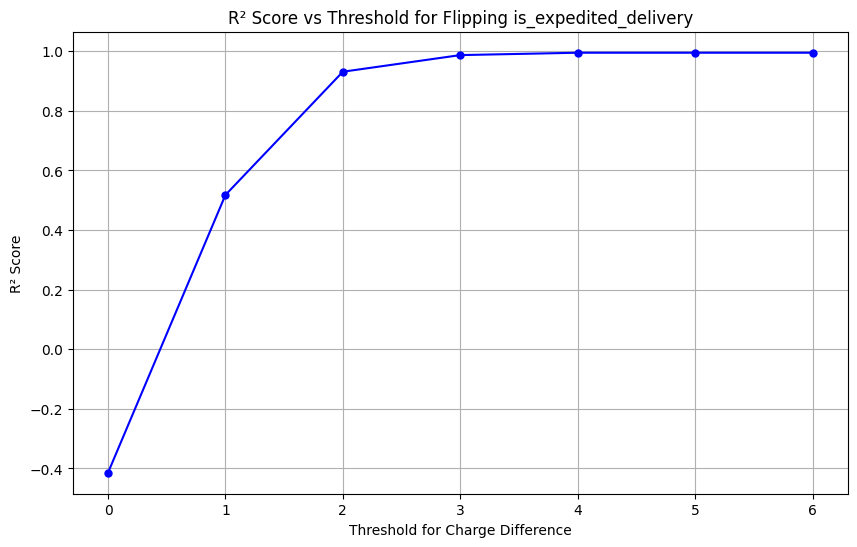

In [694]:




# Function to prepare features for the linear regression model
def prepare_features(df):
    return pd.DataFrame({
        'distance': df['distance_to_nearest_warehouse'],
        'expedited': df['is_expedited_delivery'].astype(int),
        'happy_customer': df['is_happy_customer'].astype(int)
    })

# Function to predict delivery charges based on the trained season model
def predict_delivery_charges_for_dirty_df(row):
    if row['delivery_charges']:  # Only predict if delivery charge is missing
        features = prepare_features(row.to_frame().T)
        if not features.isna().any().any():
            season_model = season_models.get(row['season'])
            if season_model:
                return season_model.predict(features)[0]  # Predict using the trained model
    return row['delivery_charges']

# Function to flip the 'is_expedited_delivery' values
def flip_expedited_delivery(value):
    return not value if pd.notna(value) else value

# Store R² scores for each threshold
thresholds = np.arange(0, 7, 1)
r2_scores = []

# Iterate over each threshold
for threshold in thresholds:
    # Reset the copy of dirty_df
    dirty_df_copy = dirty_df.copy()

    # Apply the trained models to predict delivery charges
    dirty_df_copy['predicted_delivery_charges'] = dirty_df_copy.apply(predict_delivery_charges_for_dirty_df, axis=1)

    # Calculate the difference between the predicted and actual delivery charges
    dirty_df_copy['charge_difference'] = np.abs(dirty_df_copy['delivery_charges'] - dirty_df_copy['predicted_delivery_charges'])

    # Filter rows where the delivery charge prediction is not accurate based on the current threshold
    inaccurate_predictions = dirty_df_copy[dirty_df_copy['charge_difference'] > threshold]

    # Flip the 'is_expedited_delivery' values in inaccurate_predictions
    inaccurate_predictions['is_expedited_delivery'] = inaccurate_predictions['is_expedited_delivery'].apply(flip_expedited_delivery)

    # Update the original dirty_df_copy with the modified values from inaccurate_predictions
    dirty_df_copy.loc[inaccurate_predictions.index, 'is_expedited_delivery'] = inaccurate_predictions['is_expedited_delivery']

    # Re-run the predictions on the updated data
    dirty_df_copy['predicted_delivery_charges'] = dirty_df_copy.apply(predict_delivery_charges_for_dirty_df, axis=1)

    # Calculate R² (R-squared) on the updated data
    mask = ~dirty_df_copy['delivery_charges'].isna()  # Filter out NaN values

    # Calculate R² score between actual and predicted delivery charges
    r2 = r2_score(dirty_df_copy.loc[mask, 'delivery_charges'], dirty_df_copy.loc[mask, 'predicted_delivery_charges'])
    print(r2)
    print(threshold)
    # Append the R² score for the current threshold
    r2_scores.append(r2)

# Plot the R² scores against the thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, r2_scores, marker='o', color='b', linestyle='-', markersize=5)
plt.title('R² Score vs Threshold for Flipping is_expedited_delivery')
plt.xlabel('Threshold for Charge Difference')
plt.ylabel('R² Score')
plt.grid(True)
plt.show()


We know that is_expidited is one of the features in our model , hence we use the model built on the missing data for the dirty data and predict delivery charges, we then calculate the difference between the predcted delivery charge and actual delivery charge, now for the records that have a differnece in value we want to update the is_expidited field from True to False or False to True and test our model for a high r squared score, to find an appropriate threshold we use the elbow method, where accross differet thresholds the r squared is calculated and the thresholds after which r squared becomes constant we set that as the final threshold to select records for which is_expidited should be updated.

In [695]:


# Function to prepare features for the linear regression model
def prepare_features(df):
    return pd.DataFrame({
        'distance': df['distance_to_nearest_warehouse'],
        'expedited': df['is_expedited_delivery'].astype(int),
        'happy_customer': df['is_happy_customer'].astype(int)
    })

# Function to predict delivery charges based on the trained season model
def predict_delivery_charges_for_dirty_df(row):
    if row['delivery_charges']:  # Only predict if delivery charge is missing
        features = prepare_features(row.to_frame().T)
        if not features.isna().any().any():
            season_model = season_models.get(row['season'])
            if season_model:
                return season_model.predict(features)[0]  # Predict using the trained model
    return row['delivery_charges']

# Function to flip the 'is_expedited_delivery' values
def flip_expedited_delivery(value):
    return not value if pd.notna(value) else value

# Set the threshold to 3.3
threshold = 4

# Apply the trained models to predict delivery charges
dirty_df['predicted_delivery_charges'] = dirty_df.apply(predict_delivery_charges_for_dirty_df, axis=1)

# Calculate the difference between the predicted and actual delivery charges
dirty_df['charge_difference'] = np.abs(dirty_df['delivery_charges'] - dirty_df['predicted_delivery_charges'])

# Filter rows where the delivery charge prediction is not accurate based on the threshold (3.3)
inaccurate_predictions = dirty_df[dirty_df['charge_difference'] > threshold]

# Capture the indices of the rows that will be updated
updated_indices = inaccurate_predictions.index.tolist()

# Flip the 'is_expedited_delivery' values in inaccurate_predictions
inaccurate_predictions['is_expedited_delivery'] = inaccurate_predictions['is_expedited_delivery'].apply(flip_expedited_delivery)

# Update the original dirty_df with the modified values from inaccurate_predictions
dirty_df.loc[inaccurate_predictions.index, 'is_expedited_delivery'] = inaccurate_predictions['is_expedited_delivery']

# Drop unnecessary columns ('predicted_delivery_charges' and 'charge_difference')
dirty_df = dirty_df.drop(columns=['predicted_delivery_charges', 'charge_difference'], errors='ignore')

# Display the updated indices
print(f"\nIndices of rows where 'is_expedited_delivery' was updated: {updated_indices}")

# Re-run the predictions on the updated data
dirty_df['predicted_delivery_charges'] = dirty_df.apply(predict_delivery_charges_for_dirty_df, axis=1)

# Calculate R² (R-squared) on the updated data
mask = ~dirty_df['delivery_charges'].isna()  # Filter out NaN values

# Calculate R² score between actual and predicted delivery charges
r2 = r2_score(dirty_df.loc[mask, 'delivery_charges'], dirty_df.loc[mask, 'predicted_delivery_charges'])

# Drop the 'predicted_delivery_charges' column after R² calculation
dirty_df = dirty_df.drop(columns=['predicted_delivery_charges'], errors='ignore')

# Print the R² score after updates
print(f"\nR² score for the delivery charge predictions after updating 'is_expedited_delivery': {r2:.4f}")


<ipython-input-695-41a4b77cd6f3>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inaccurate_predictions['is_expedited_delivery'] = inaccurate_predictions['is_expedited_delivery'].apply(flip_expedited_delivery)



Indices of rows where 'is_expedited_delivery' was updated: [1, 2, 5, 6, 7, 18, 40, 62, 76, 88, 89, 92, 96, 110, 113, 132, 155, 178, 182, 204, 208, 213, 218, 226, 227, 253, 260, 262, 267, 268, 282, 285, 291, 310, 327, 328, 336, 337, 341, 360, 361, 364, 367, 369, 374, 383, 407, 428, 429, 434, 437, 484, 488, 492]

R² score for the delivery charge predictions after updating 'is_expedited_delivery': 0.9952


In [696]:
dirty_df = dirty_df.drop(columns='index')

In [697]:
# Assuming 'df' is your DataFrame
dirty_df.to_csv('Group103_dirty_data_solution.csv', index=False)


# **2.MISSING DATA**

Lets load and explore the data as shown below:

In [698]:
#Path to missing data file
root_path = '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/student_data/Group103/'

**Exploratory Data Analysis:**





In [699]:
missing_data = pd.read_csv(f'{root_path}/Group103_missing_data.csv')

In [700]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              445 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    485 non-null    float64
 6   delivery_charges               460 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    485 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

This output shows the structure of the missing_data DataFrame, with 500 rows and 16 columns. Several columns, including nearest_warehouse, order_price, delivery_charges, distance_to_nearest_warehouse, and is_happy_customer, have missing values. The column data types are a mix of objects, floats, and booleans.

In [701]:
missing_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse,is_happy_customer
count,485.000000,460.00000,500.000000,500.000000,500.00000,485.000000,469.000000,460.000000
mean,13440.556701,75.68700,-37.811672,144.966339,11.30000,12038.781526,1.103270,0.702174
std,7589.177259,14.86408,0.007528,0.021526,8.70411,6982.452821,0.504873,0.457801
min,580.000000,45.10000,-37.833051,144.910758,0.00000,502.500000,0.043000,0.000000
25%,7855.000000,65.48500,-37.817575,144.951098,5.00000,6881.510000,0.738600,0.000000
50%,11900.000000,75.08500,-37.811775,144.963860,10.00000,10738.730000,1.068100,1.000000
75%,18330.000000,82.61250,-37.805861,144.982421,15.00000,16477.970000,1.444600,1.000000
max,43610.000000,110.11000,-37.791564,145.015417,25.00000,39329.350000,3.260700,1.000000


In [702]:
missing_data.describe(include=['O']) # 'O' for Objects

,order_id,customer_id,date,nearest_warehouse,shopping_cart,season,latest_customer_review
count,500,500,500,445,500,500,500
unique,500,493,280,3,470,4,500
top,ORD225890,ID0634783954,2019-01-02,Thompson,"[('Universe Note', 2), ('Toshika 750', 1)]",Spring,ok i like
freq,1,2,6,193,2,135,1


The statistical summary provides descriptive statistics for the numerical columns, showing the count, mean, standard deviation, and range of values. It highlights the variation in key columns like order_price and delivery_charges and indicates missing values in these columns. Additionally, the summary for object-type columns shows unique counts and frequent values, such as "Thompson" for nearest_warehouse.

In [703]:
missing_data.describe(include='all')

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
count,500,500,500,445,500,485.000000,460.00000,500.000000,500.000000,500.00000,485.000000,500,500,469.000000,500,460.000000
unique,500,493,280,3,470,NaN,NaN,NaN,NaN,NaN,NaN,4,2,NaN,500,NaN
top,ORD225890,ID0634783954,2019-01-02,Thompson,"[('Universe Note', 2), ('Toshika 750', 1)]",NaN,NaN,NaN,NaN,NaN,NaN,Spring,False,NaN,ok i like,NaN
freq,1,2,6,193,2,NaN,NaN,NaN,NaN,NaN,NaN,135,265,NaN,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,13440.556701,75.68700,-37.811672,144.966339,11.30000,12038.781526,NaN,NaN,1.103270,NaN,0.702174
std,NaN,NaN,NaN,NaN,NaN,7589.177259,14.86408,0.007528,0.021526,8.70411,6982.452821,NaN,NaN,0.504873,NaN,0.457801
min,NaN,NaN,NaN,NaN,NaN,580.000000,45.10000,-37.833051,144.910758,0.00000,502.500000,NaN,NaN,0.043000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,7855.000000,65.48500,-37.817575,144.951098,5.00000,6881.510000,NaN,NaN,0.738600,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,11900.000000,75.08500,-37.811775,144.963860,10.00000,10738.730000,NaN,NaN,1.068100,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,18330.000000,82.61250,-37.805861,144.982421,15.00000,16477.970000,NaN,NaN,1.444600,NaN,1.000000


In [704]:
#Identify which fields have null values
missing_data.isnull().sum()

,0
order_id,0
customer_id,0
date,0
nearest_warehouse,55
shopping_cart,0
order_price,15
delivery_charges,40
customer_lat,0
customer_long,0
coupon_discount,0


This table displays the count of missing values for each column in the dataset. 55 missing values are identified in the nearest_warehouse column, and other significant gaps include 40 missing values in delivery_charges and is_happy_customer. Several other columns also have smaller amounts of missing data that will require handling

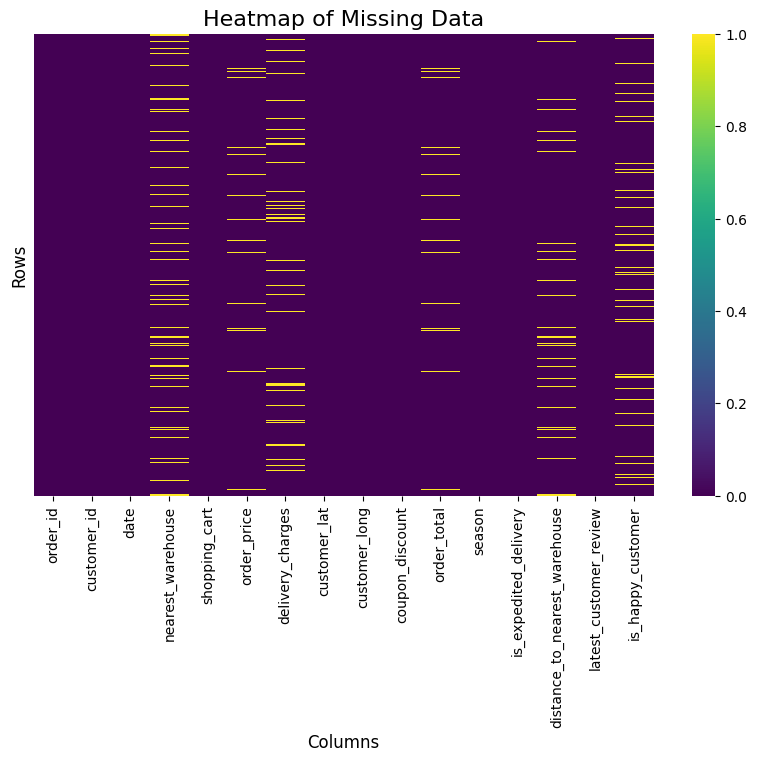

In [705]:
# Generate heatmap for missing data
plt.figure(figsize=(10, 6))
sns.heatmap(missing_data.isnull(), cbar=True, cmap='viridis', yticklabels=False)

# Add title and labels
plt.title('Heatmap of Missing Data', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)

# Display the plot
plt.show()


his heatmap visualizes the missing data in the dataset. The yellow lines indicate rows with missing values, particularly in columns like nearest_warehouse, order_price, delivery_charges, distance_to_nearest_warehouse, and is_happy_customer. The absence of color in some areas suggests columns with no missing data, such as order_id and customer_id

# **2.1 Nearest_warehouse:**


In [706]:
missing_data['nearest_warehouse'].value_counts()

,count
nearest_warehouse,
Thompson,193
Nickolson,148
Bakers,104


In [707]:
missing_data[missing_data['nearest_warehouse'].isnull()].head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD225890,ID0660546015,2019-11-21,NaN,"[('Candle Inferno', 1), ('Thunder line', 1)]",2610.0,100.82,-37.812235,144.989870,25,2058.32,Spring,True,0.5334,ok i like,1.0
1,ORD460359,ID1691663875,2019-12-14,NaN,"[('Candle Inferno', 1), ('Universe Note', 2), ...",33870.0,77.83,-37.801183,144.956926,10,30560.83,Summer,False,1.5452,five stars love this phone best phone i had,1.0
8,ORD262259,ID2353534946,2019-01-27,NaN,"[('iStream', 1), ('Thunder line', 2), ('Alcon ...",22410.0,107.71,-37.800036,144.963344,0,22517.71,Summer,True,NaN,"five stars great phone, great price!",1.0
15,ORD156686,ID2948774581,2019-12-04,NaN,"[('iStream', 2), ('iAssist Line', 1), ('Candle...",3385.0,61.74,-37.808763,144.971888,25,2600.49,Summer,False,1.1136,thunder simply did not do anything it was adve...,0.0
21,ORD403883,ID2481930660,2019-11-27,NaN,"[('Lucent 330S', 2), ('Alcon 10', 1)]",11410.0,58.75,-37.810285,145.001585,25,8616.25,Spring,False,0.5596,"one star battery suck, have to charge 2 times ...",0.0


<ipython-input-708-b992eab2d351>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_retail_store[['calculated_nearest_warehouse', 'calculated_distance']] = filtered_retail_store.apply(calculate_distances, axis=1)
<ipython-input-708-b992eab2d351>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_retail_store[['calculated_nearest_warehouse', 'calculated_distance']] = filtered_retail_store.apply(calculate_distances, axis=1)
<ipython-input-708-b992eab2d351>:38: SettingWithCopyWarning: 
A value 

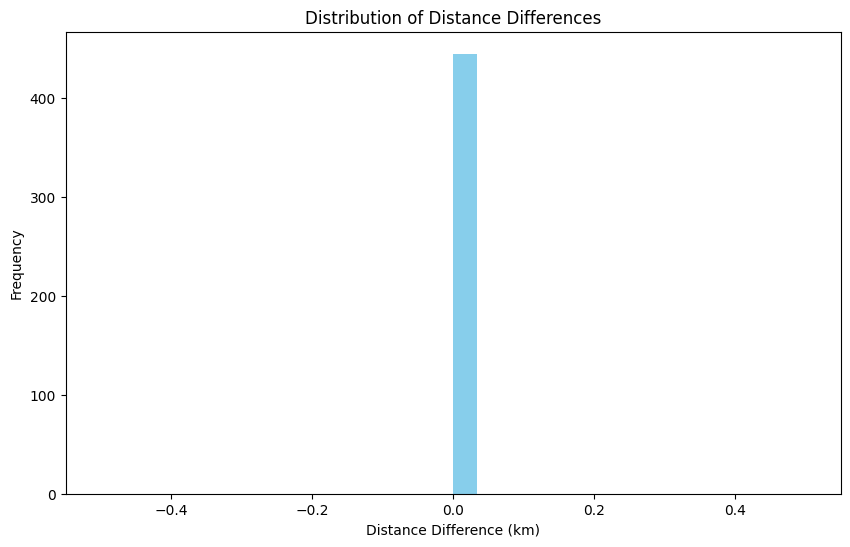

Empty DataFrame
Columns: [order_id, customer_lat, customer_long, nearest_warehouse, calculated_nearest_warehouse, distance_to_nearest_warehouse, calculated_distance, distance_difference]
Index: []


In [708]:


# Load warehouse coordinates
warehouse_df = pd.read_csv('/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/warehouses.csv')
warehouse_coordinates = warehouse_df.set_index('names')[['lat', 'lon']].T.to_dict()


def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    r = 6378  # Radius of the Earth in kilometers
    return c * r

filtered_retail_store = missing_data.dropna(subset=['nearest_warehouse', 'distance_to_nearest_warehouse', 'customer_lat', 'customer_long'])

#Calculate distance
def calculate_distances(row):
    customer_lat, customer_long = row['customer_lat'], row['customer_long']
    distances = {}
    #Get the distance to all warehouses
    for warehouse, coords in warehouse_coordinates.items():
        warehouse_lat, warehouse_lon = coords['lat'], coords['lon']
        distance = haversine(customer_long, customer_lat, warehouse_lon, warehouse_lat)
        distances[warehouse] = distance
    #Store the nearest warehouse
    nearest_warehouse = min(distances, key=distances.get)
    #Store the nearest distance
    nearest_distance = round(distances[nearest_warehouse], 4)
    return pd.Series([nearest_warehouse, nearest_distance])


filtered_retail_store[['calculated_nearest_warehouse', 'calculated_distance']] = filtered_retail_store.apply(calculate_distances, axis=1)
#Calculate the differnece between calculated distance and original distance
filtered_retail_store['distance_difference'] = abs(filtered_retail_store['calculated_distance'] - filtered_retail_store['distance_to_nearest_warehouse'])
#Chcek for any mismatch in the distance
warehouse_mismatch = filtered_retail_store[filtered_retail_store['calculated_nearest_warehouse'] != filtered_retail_store['nearest_warehouse']]


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(filtered_retail_store['distance_difference'], bins=30, color='skyblue')
plt.title('Distribution of Distance Differences')
plt.xlabel('Distance Difference (km)')
plt.ylabel('Frequency')
plt.show()

# Display the rows with discrepancies
discrepancies = filtered_retail_store[filtered_retail_store['distance_difference'] > 0.1]

print(discrepancies[['order_id', 'customer_lat', 'customer_long', 'nearest_warehouse', 'calculated_nearest_warehouse', 'distance_to_nearest_warehouse', 'calculated_distance', 'distance_difference']])


In order to impute the missing data in the nearest warehouse , we want to calculate the distance from the customer_lat and customer_long to all the warehouses and save the warehouse that has the smallest value, in order to verify this method we first drop null rows and perfrom this calculation on the available accurate data and then check if there is a differnece between the calculated distance and original distance and if there is a mismatch in the warehouse name, we plot a graph to check the distribution of the difference values, since it is 0 for all records we can now apply this method to our main data.

In [709]:

warehouses = {
    'Nickolson': {'lat': -37.818595, 'lon': 144.969551},
    'Thompson': {'lat': -37.8126732, 'lon': 144.9470689},
    'Bakers': {'lat': -37.8099961, 'lon': 144.995232}
}

# Haversine formula to calculate distance between two GPS points
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6378.0  # Earth's radius in kilometers

    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))

    distance = R * c
    return distance

In [710]:
def find_nearest_warehouse(row):
    distances = []
    for name, location in warehouses.items():
        distance = haversine_distance(row['customer_lat'], row['customer_long'],
                                      location['lat'], location['lon'])
        distances.append((name, distance))
    return min(distances, key=lambda x: x[1])[0]


mask = missing_data['nearest_warehouse'].isnull()
missing_data.loc[mask, 'nearest_warehouse'] = missing_data[mask].apply(find_nearest_warehouse, axis=1)


print("Number of missing values in nearest_warehouse after imputation:",
      missing_data['nearest_warehouse'].isnull().sum())

# Check the distribution of warehouses after imputation
print("\nDistribution of warehouses after imputation:")
print(missing_data['nearest_warehouse'].value_counts())

Number of missing values in nearest_warehouse after imputation: 0

Distribution of warehouses after imputation:
nearest_warehouse
Thompson     211
Nickolson    168
Bakers       121
Name: count, dtype: int64


In [711]:
#Check if any missing values are present
missing_data['nearest_warehouse'].isnull().sum()

0

# **2.2 Distance to Nearest Warehouse**

In [712]:
missing_data['distance_to_nearest_warehouse'].isnull().sum()

31

In [713]:
missing_data[missing_data['distance_to_nearest_warehouse'].isnull()].head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
8,ORD262259,ID2353534946,2019-01-27,Thompson,"[('iStream', 1), ('Thunder line', 2), ('Alcon ...",22410.0,107.71,-37.800036,144.963344,0,22517.71,Summer,True,NaN,"five stars great phone, great price!",1.0
71,ORD137153,ID0306904038,2019-05-30,Thompson,"[('Universe Note', 1), ('pearTV', 2), ('iStrea...",16370.0,65.04,-37.807337,144.947476,10,14798.04,Autumn,True,NaN,márcame 415 8714917 el teléfono no sirve no se...,0.0
82,ORD135326,ID6221450533,2019-06-03,Bakers,"[('Lucent 330S', 1), ('iAssist Line', 2), ('Ol...",6905.0,78.54,-37.808815,144.982787,10,6293.04,Winter,True,NaN,"excellent deal awesome phone, really good buil...",1.0
105,ORD318293,ID3144992705,2019-04-03,Bakers,"[('iAssist Line', 2), ('Alcon 10', 2), ('pearT...",34970.0,64.02,-37.815220,144.989895,0,35034.02,Autumn,True,NaN,phone locked how do you unlock this phone. i b...,0.0
108,ORD208486,ID0575554320,2019-05-11,Nickolson,"[('Olivia x460', 1), ('Toshika 750', 1)]",5545.0,68.43,-37.826100,144.984741,0,5613.43,Autumn,False,NaN,five stars it is just an amazing phone.,1.0


In [714]:
def calculate_distance_to_warehouse(row):
    warehouse = warehouses[row['nearest_warehouse']]
    return haversine_distance(row['customer_lat'], row['customer_long'],
                              warehouse['lat'], warehouse['lon'])

mask = missing_data['distance_to_nearest_warehouse'].isnull()
missing_data.loc[mask, 'distance_to_nearest_warehouse'] = missing_data[mask].apply(calculate_distance_to_warehouse, axis=1)

print("\nNumber of missing values in distance_to_nearest_warehouse after recalculation:",
      missing_data['distance_to_nearest_warehouse'].isnull().sum())

# Display a few rows to verify the changes
print("\nSample rows after imputation:")
print(missing_data[['nearest_warehouse', 'distance_to_nearest_warehouse']].head(10))




Number of missing values in distance_to_nearest_warehouse after recalculation: 0

Sample rows after imputation:
  nearest_warehouse  distance_to_nearest_warehouse
0            Bakers                       0.533400
1          Thompson                       1.545200
2            Bakers                       1.660700
3          Thompson                       0.644300
4         Nickolson                       1.755600
5          Thompson                       1.332400
6          Thompson                       0.948100
7          Thompson                       0.817100
8          Thompson                       2.006953
9          Thompson                       0.721700


Through our check for nearest warehouse and the bar plot we know our distance calculation formula is accurate hence we use the same formula to impute missing values in the distance to nearest warehouse.

# **2.3 Is Happy Customer:**

In [715]:
missing_data['is_happy_customer'].isnull().sum()

40

In [716]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


def classify_sentiment(review):
    if pd.isnull(review):
        return 1
    sentiment = sia.polarity_scores(review)
    return 1 if sentiment['compound'] >= 0.05 else 0

# Apply sentiment analysis to missing `is_happy_customer` values
for index, row in missing_data[missing_data['is_happy_customer'].isnull()].iterrows():
    review = row['latest_customer_review']
    missing_data.at[index, 'is_happy_customer'] = classify_sentiment(review)



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [717]:
print("Number of missing values in is_happy_customer after imputation:",
      missing_data['is_happy_customer'].isnull().sum())


print("\nDistribution of happy customers after imputation:")
print(missing_data['is_happy_customer'].value_counts(normalize=True))


print("\nSample rows after imputation:")
print(missing_data[['order_id','latest_customer_review', 'is_happy_customer']].head(10))

Number of missing values in is_happy_customer after imputation: 0

Distribution of happy customers after imputation:
is_happy_customer
1.0    0.698
0.0    0.302
Name: proportion, dtype: float64

Sample rows after imputation:
    order_id                             latest_customer_review  \
0  ORD225890                                          ok i like   
1  ORD460359        five stars love this phone best phone i had   
2  ORD237561  loved the phone got this as a bcakup phone but...   
3  ORD153843  make a great phone greater and do yourself a f...   
4  ORD441762  the battery life. i ordered on line one of the...   
5  ORD387536  i bought this for my wife to replace her old c...   
6  ORD357177  i love the camera on this thing i love the cam...   
7  ORD273330  took product back and was told that in order t...   
8  ORD262259               five stars great phone, great price!   
9  ORD109025  do not buy edge cellular are slow worthless re...   

   is_happy_customer  
0             

is_happy_customer depends on the latets_review column , we use sentiment analysis to define the values for is_happy_customer. We use the SentimentIntensityAnalyzer package to be able to generate polarity scores , for a polarity score of 0.05 or higher is set to 1 otherwise is_happy_customer is set to 0.

# **2.4 Delivery Charge missing data:**


In [718]:
missing_data['delivery_charges'].isnull().sum()

40

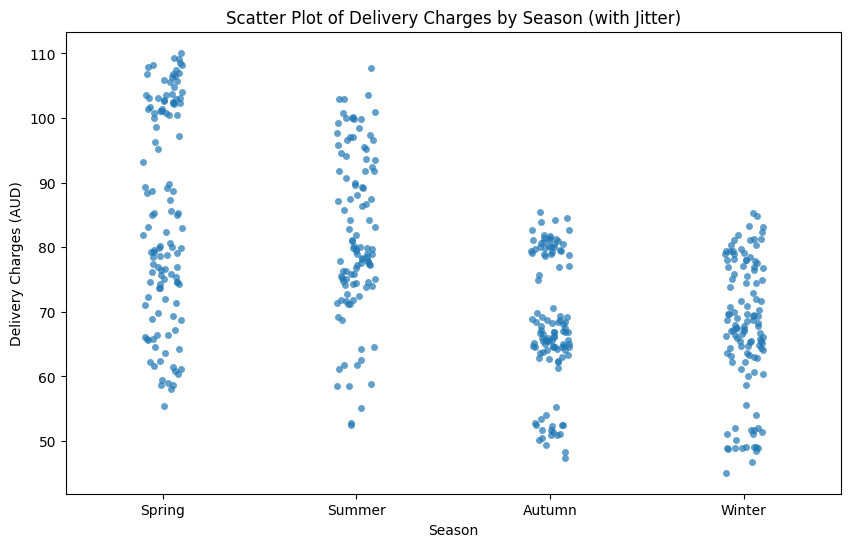

In [719]:


plt.figure(figsize=(10, 6))

sns.stripplot(x='season', y='delivery_charges', data=missing_data, jitter=True, alpha=0.7)

# Set title and labels
plt.title('Scatter Plot of Delivery Charges by Season (with Jitter)')
plt.xlabel('Season')
plt.ylabel('Delivery Charges (AUD)')

# Show plot
plt.show()


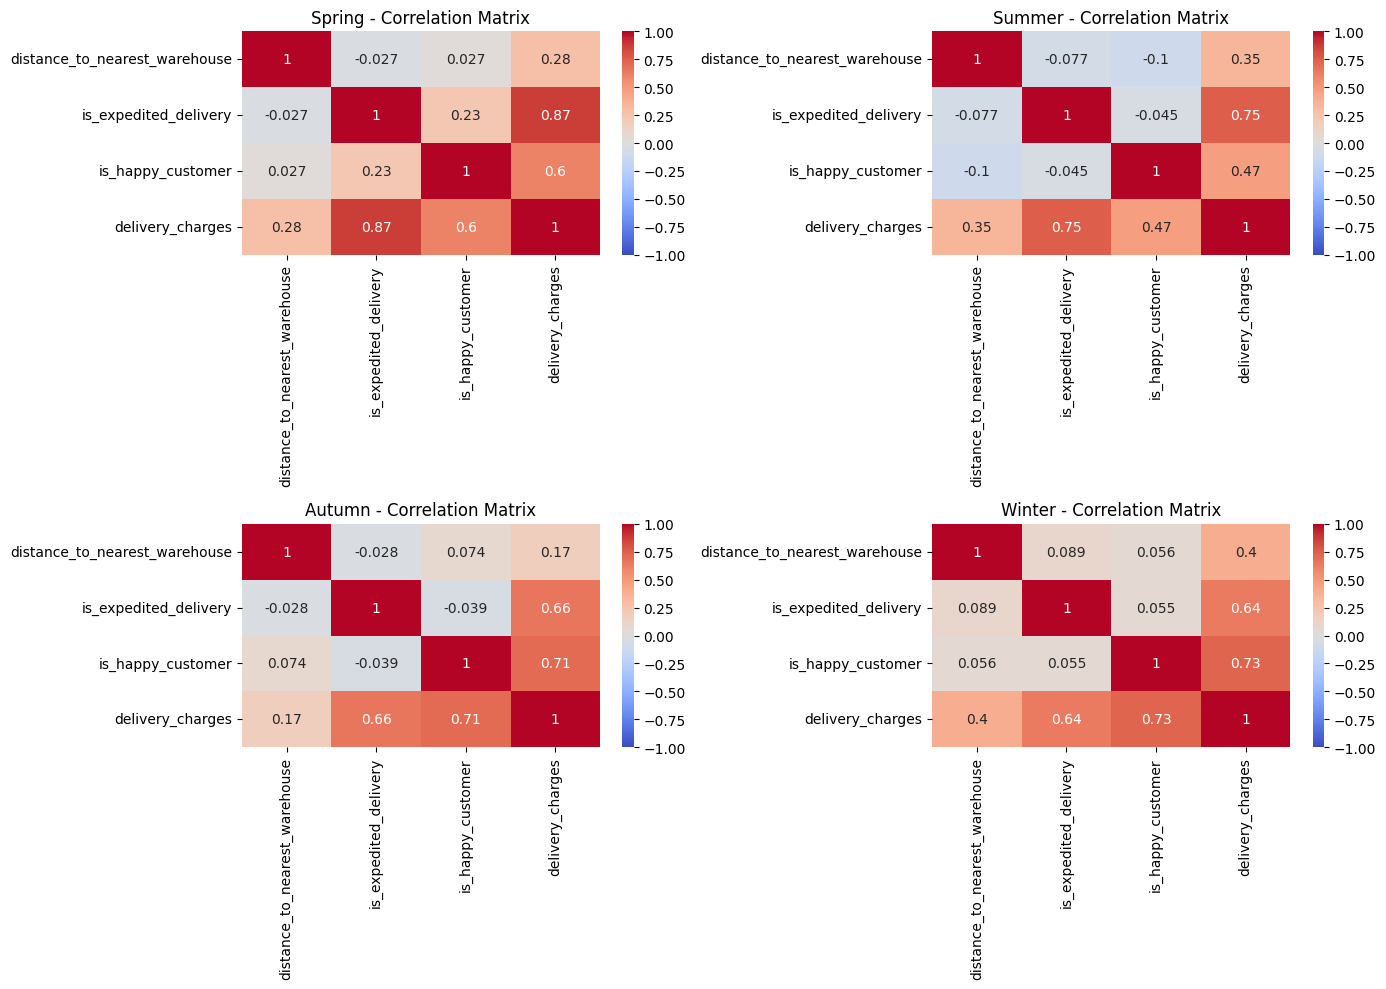

In [720]:

# Create correlation heatmaps for each season
seasons = missing_data['season'].unique()
plt.figure(figsize=(14, 10))
for i, season in enumerate(seasons):
    plt.subplot(2, 2, i+1)
    season_data = missing_data[missing_data['season'] == season]
    corr = season_data[['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'delivery_charges']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'{season} - Correlation Matrix')

plt.tight_layout()
plt.show()


Given delivery charge is dependent on the season , is_expidited, distance to nearest warehouse and is_happy_customer column we perform EDA to explore methods to build our linear model, through the scatter plot we notice the data is split by the seasons , each season has their own relations, to further explore this we build individual correlation plots for each season to identify the relation between features and target variables, using this information we decided to build an ensmble model where individual models are built for each season in order to capture the categorical feature of the season and the indivdiual relations between target and features for each season.

In [721]:



# Function to prepare features for the linear regression model
def prepare_features(df):
    return pd.DataFrame({
        'distance': df['distance_to_nearest_warehouse'],
        'expedited': df['is_expedited_delivery'].astype(int),
        'happy_customer': df['is_happy_customer'].astype(int)
    })


def train_season_model(season_data):
    X = prepare_features(season_data)
    y = season_data['delivery_charges']

    # Remove rows with NaN in either X or y
    mask = ~(X.isna().any(axis=1) | y.isna())
    X = X[mask]
    y = y[mask]

    model = LinearRegression()
    model.fit(X, y)
    return model

# Train models for each season
season_models = {}
for season in missing_data['season'].unique():
    season_data = missing_data[missing_data['season'] == season]
    season_models[season] = train_season_model(season_data)

    # Print R2 score for each season model
    X = prepare_features(season_data)
    y = season_data['delivery_charges']
    mask = ~(X.isna().any(axis=1) | y.isna())
    r2 = r2_score(y[mask], season_models[season].predict(X[mask]))
    print(f"R2 score for {season} model: {r2:.4f}")

# Function to predict delivery charges
def predict_delivery_charges(row):
    if pd.isna(row['delivery_charges']):
        features = prepare_features(row.to_frame().T)
        if not features.isna().any().any():
            return season_models[row['season']].predict(features)[0]
    return row['delivery_charges']

# Impute missing delivery charges
missing_data['delivery_charges'] = missing_data.apply(predict_delivery_charges, axis=1)

# Verify results
print("\nNumber of missing values in delivery_charges after imputation:",
      missing_data['delivery_charges'].isnull().sum())

# Display a few rows to verify the changes
print("\nSample rows after imputation:")
print(missing_data[['season', 'distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'delivery_charges']].head(10))

# Optional: Overall R2 score after imputation
X = prepare_features(missing_data)
y = missing_data['delivery_charges']
mask = ~(X.isna().any(axis=1) | y.isna())
overall_r2 = r2_score(y[mask], missing_data.apply(predict_delivery_charges, axis=1)[mask])
print(f"\nOverall R2 score after imputation: {overall_r2:.4f}")

R2 score for Spring model: 0.9969
R2 score for Summer model: 0.9934
R2 score for Autumn model: 0.9899
R2 score for Winter model: 0.9909

Number of missing values in delivery_charges after imputation: 0

Sample rows after imputation:
   season  distance_to_nearest_warehouse  is_expedited_delivery  \
0  Spring                       0.533400                   True   
1  Summer                       1.545200                  False   
2  Autumn                       1.660700                   True   
3  Summer                       0.644300                   True   
4  Summer                       1.755600                   True   
5  Winter                       1.332400                   True   
6  Summer                       0.948100                  False   
7  Autumn                       0.817100                  False   
8  Summer                       2.006953                   True   
9  Autumn                       0.721700                   True   

   is_happy_customer  deliver

On building the model for delivery charge we evaluate the model using r squared score , we get an r squared of 1.0 for the overall data and as per each season the r squared score is within 0.99, this shows a good linear model with accurate predictions has been built.

# **2.5 Order Price:**


In [722]:


#Filter the DataFrame to select rows where order_price is not null
filtered_df = missing_data[missing_data['order_price'].notnull()]

# Select shopping_cart and order_price columns
selected_data = filtered_df[['shopping_cart', 'order_price']].copy()

# Convert the shopping_cart strings to actual lists of tuples
selected_data['shopping_cart'] = selected_data['shopping_cart'].apply(ast.literal_eval)


unique_items = set()
for cart in selected_data['shopping_cart']:
    for item, _ in cart:
        unique_items.add(item)

items = sorted(list(unique_items))

# Create coefficients matrix
coeff_matrix = []
result_vector = []

for index, row in selected_data.iterrows():
    cart = row['shopping_cart']
    order_price = row['order_price']

    # Initialize a row for coefficients
    row_coeffs = [0] * len(items)
    for item, quantity in cart:
        row_coeffs[items.index(item)] = quantity  # Set quantity for the item

    coeff_matrix.append(row_coeffs)  # Add row to the coefficients matrix
    result_vector.append(order_price)  # Add order price to the result vector


unit_prices, residuals, rank, s = np.linalg.lstsq(np.array(coeff_matrix), np.array(result_vector), rcond=None)

# Return a dictionary of item names and their corresponding unit prices
unit_price_dict = dict(zip(items, unit_prices))

# Display the unit prices
print("Unit Prices:\n", unit_price_dict)


Unit Prices:
 {'Alcon 10': 8950.0, 'Candle Inferno': 429.99999999999727, 'Lucent 330S': 1229.9999999999955, 'Olivia x460': 1224.999999999999, 'Thunder line': 2179.9999999999964, 'Toshika 750': 4320.000000000002, 'Universe Note': 3449.999999999998, 'iAssist Line': 2224.9999999999977, 'iStream': 149.99999999999704, 'pearTV': 6310.0}


                                         shopping_cart  order_price  \
0             [(Candle Inferno, 1), (Thunder line, 1)]       2610.0   
1    [(Candle Inferno, 1), (Universe Note, 2), (Alc...      33870.0   
2                     [(iStream, 1), (Olivia x460, 2)]       2600.0   
3    [(Candle Inferno, 2), (Olivia x460, 2), (Alcon...      12410.0   
4    [(Lucent 330S, 2), (iAssist Line, 1), (iStream...       5845.0   
..                                                 ...          ...   
495  [(Candle Inferno, 1), (Universe Note, 1), (Luc...      10660.0   
496                  [(Alcon 10, 2), (Toshika 750, 1)]      22220.0   
497         [(Alcon 10, 2), (pearTV, 2), (iStream, 1)]      30670.0   
498  [(pearTV, 2), (Thunder line, 1), (Toshika 750,...      26890.0   
499                    [(Lucent 330S, 2), (pearTV, 1)]       8770.0   

     estimated_order_price  price_difference  
0                   2610.0     -6.366463e-12  
1                  33870.0      0.000000e+00  
2     

<ipython-input-723-dd4df65a510c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['shopping_cart'] = filtered_df['shopping_cart'].apply(ast.literal_eval)
<ipython-input-723-dd4df65a510c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['estimated_order_price'] = filtered_df['shopping_cart'].apply(lambda x: calculate_estimated_price(x, unit_price_dict))
<ipython-input-723-dd4df65a510c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

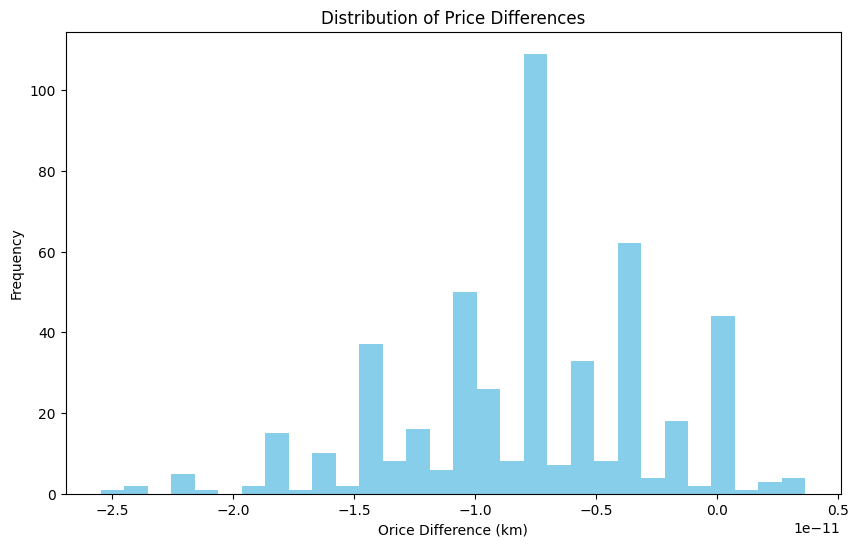

In [723]:
def calculate_estimated_price(cart, unit_prices):
  estimated_price = sum(unit_prices[item] * quantity for item, quantity in cart if item in unit_prices)
  return estimated_price

filtered_df['shopping_cart'] = filtered_df['shopping_cart'].apply(ast.literal_eval)
filtered_df['estimated_order_price'] = filtered_df['shopping_cart'].apply(lambda x: calculate_estimated_price(x, unit_price_dict))
filtered_df['price_difference'] = filtered_df['estimated_order_price'] - filtered_df['order_price']


print(filtered_df[['shopping_cart', 'order_price', 'estimated_order_price', 'price_difference']])




plt.figure(figsize=(10, 6))
plt.hist(filtered_df['price_difference'], bins=30, color='skyblue')
plt.title('Distribution of Price Differences')
plt.xlabel('Orice Difference (km)')
plt.ylabel('Frequency')
plt.show()

#

In [724]:

#This function extracts the items from the shopping cart
def extract_items(cart_str):
    cart = literal_eval(cart_str)
    return {item: quantity for item, quantity in cart}
all_items = list(set(item for cart in missing_data['shopping_cart'] for item in extract_items(cart)))

#This function calculates the order price through the unit price of each item
def calculate_order_price(cart_str):
    cart = extract_items(cart_str)
    return sum(unit_price_dict[item] * quantity for item, quantity in cart.items())
#This function calculates the order total from the order price and coupon discount and deliver charge
def calculate_order_total(row):
    order_price = row['order_price'] if pd.notna(row['order_price']) else calculate_order_price(row['shopping_cart'])
    discounted_price = order_price * (1 - row['coupon_discount'] / 100)
    return discounted_price + row['delivery_charges']

# Impute missing order_price values
missing_data.loc[missing_data['order_price'].isnull(), 'order_price'] = \
    missing_data.loc[missing_data['order_price'].isnull(), 'shopping_cart'].apply(calculate_order_price)

# Impute missing order_total values
missing_data['order_total'] = missing_data.apply(calculate_order_total, axis=1)

print("\nNumber of missing values in order_price after imputation:",
      missing_data['order_price'].isnull().sum())
print("Number of missing values in order_total after imputation:",
      missing_data['order_total'].isnull().sum())

print("\nSample rows after imputation:")
print(missing_data[['shopping_cart', 'order_price', 'coupon_discount', 'delivery_charges', 'order_total']].head(10))


Number of missing values in order_price after imputation: 0
Number of missing values in order_total after imputation: 0

Sample rows after imputation:
                                       shopping_cart  order_price  \
0       [('Candle Inferno', 1), ('Thunder line', 1)]       2610.0   
1  [('Candle Inferno', 1), ('Universe Note', 2), ...      33870.0   
2               [('iStream', 1), ('Olivia x460', 2)]       2600.0   
3  [('Candle Inferno', 2), ('Olivia x460', 2), ('...      12410.0   
4  [('Lucent 330S', 2), ('iAssist Line', 1), ('iS...       5845.0   
5              [('Alcon 10', 2), ('Lucent 330S', 2)]      20360.0   
6  [('Thunder line', 1), ('Olivia x460', 1), ('iS...       3555.0   
7  [('Universe Note', 2), ('Alcon 10', 1), ('Tosh...      37110.0   
8  [('iStream', 1), ('Thunder line', 2), ('Alcon ...      22410.0   
9  [('pearTV', 1), ('iStream', 2), ('iAssist Line...       8835.0   

   coupon_discount  delivery_charges   order_total  
0               25        100.82000

In order to impute order price we need to get the unit price of each item , since we are given a shopping cart with items and their quantities we first calculate the unit price by using the numpynp.linalg.lstsq library we solve a system of equations, since we have an imbalance in the matrices created because there will be more records of the shopping cart quantitiy than the items we need to use least squares method to get the unit price, once we get the unit price order price and order total are calculated using the formulas and imputed.To check if our method of calculating order price, and check if the unit price calculated is accurate we calculate the order prioce using the unit price for the non null records and compare it to the original order price we notice a very small or almost no differnece between the calculated order price and original order price , we have plotted a distribution to understand the difference values.

# **2.6 Shopping Cart**

In [725]:
# Function to check if shopping_cart contains valid tuples with (item, quantity)
def is_valid_shopping_cart(cart):
    if isinstance(cart, list):  # Ensure the shopping cart is a list
        for entry in cart:
            if not (isinstance(entry, tuple) and len(entry) == 2):  # Check if each entry is a tuple with 2 elements
                return False
        return True
    return False  # If shopping_cart is not a list
filtered_df=missing_data.copy()
filtered_df['shopping_cart'] = filtered_df['shopping_cart'].apply(ast.literal_eval)
# Apply the function to check each shopping cart in the filtered_df DataFrame
filtered_df['is_valid_cart'] = filtered_df['shopping_cart'].apply(is_valid_shopping_cart)

# Filter rows where shopping_cart is invalid
invalid_cart_rows = filtered_df[filtered_df['is_valid_cart'] == False]

# Display the rows with invalid shopping carts
print("\nRows with invalid shopping_cart structure:")
print(invalid_cart_rows[['shopping_cart']])

# Optionally, count how many rows have invalid shopping carts
invalid_count = len(invalid_cart_rows)
print(f"\nNumber of rows with invalid shopping_cart structure: {invalid_count}")



Rows with invalid shopping_cart structure:
Empty DataFrame
Columns: [shopping_cart]
Index: []

Number of rows with invalid shopping_cart structure: 0


We check for missing data within the shopping cart by extracting each product quantity pair and check if a tupple exists with two values, there are no missing values.

In [726]:
missing_data.to_csv('Group103_missing_data_solution.csv', index=False)


# **3. Outlier Detection**

Lets load and explore the outlier dataset as shown below:

In [727]:
root_path = '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/student_data/Group103/'

In [728]:
outlier_data = pd.read_csv(f'{root_path}/Group103_outlier_data.csv')

In order to identify outliers in the delivery charge column we wnat to understand if our data is skewed hence we plot a bar plot and to identofy the outlier values we plot a boxplot:

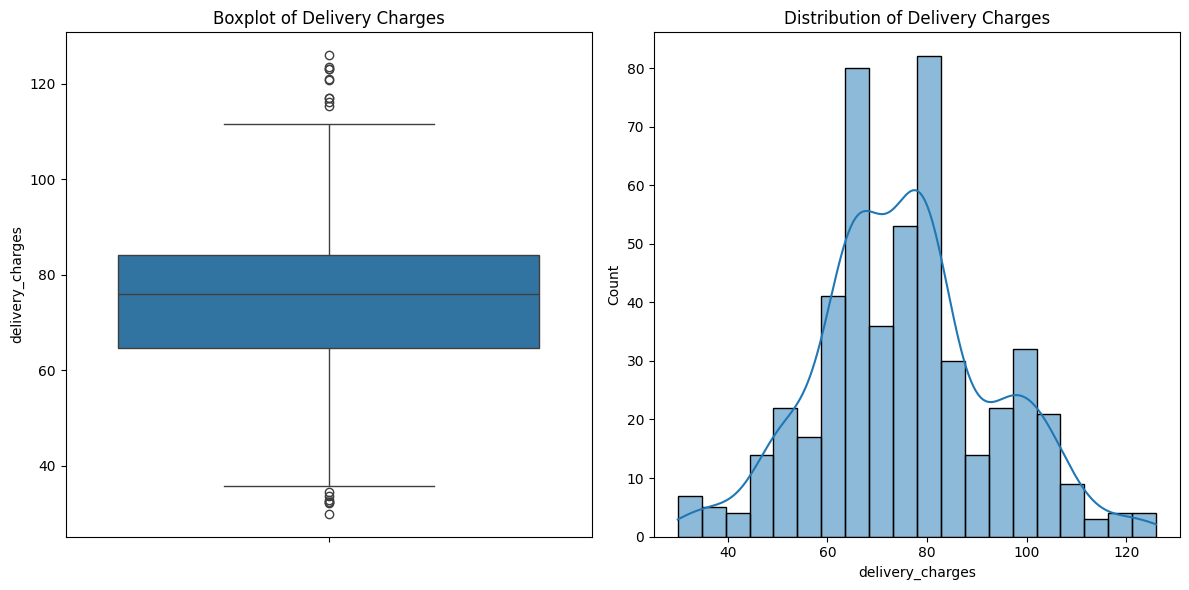

Number of outliers: 17
Percentage of outliers: 3.40%


In [729]:


outlier_df = outlier_data.copy()
# EDA for delivery_charges
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y=outlier_df['delivery_charges'])
plt.title('Boxplot of Delivery Charges')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(outlier_df['delivery_charges'], kde=True)
plt.title('Distribution of Delivery Charges')

plt.tight_layout()
plt.show()

# Calculate IQR
Q1 = outlier_df['delivery_charges'].quantile(0.25)
Q3 = outlier_df['delivery_charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = outlier_df[(outlier_df['delivery_charges'] < lower_bound) |
                      (outlier_df['delivery_charges'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {len(outliers) / len(outlier_df) * 100:.2f}%")

The boxplot of delivery charges indicates the presence of outliers, with several data points above 120 and below 40. The histogram shows a right-skewed distribution of delivery charges, with the majority of values clustered between 60 and 90. The outliers, visible in both the boxplot and histogram, suggest that these extreme values might need further investigation or potential removal to ensure accurate analysis.

Model :

R-squared for Autumn: 0.5109
R-squared for Winter: 0.5359
R-squared for Spring: 0.7501
R-squared for Summer: 0.5075

Overall R² score across all seasons: 0.6397

Total outliers identified: 40
Percentage of outliers: 8.00%


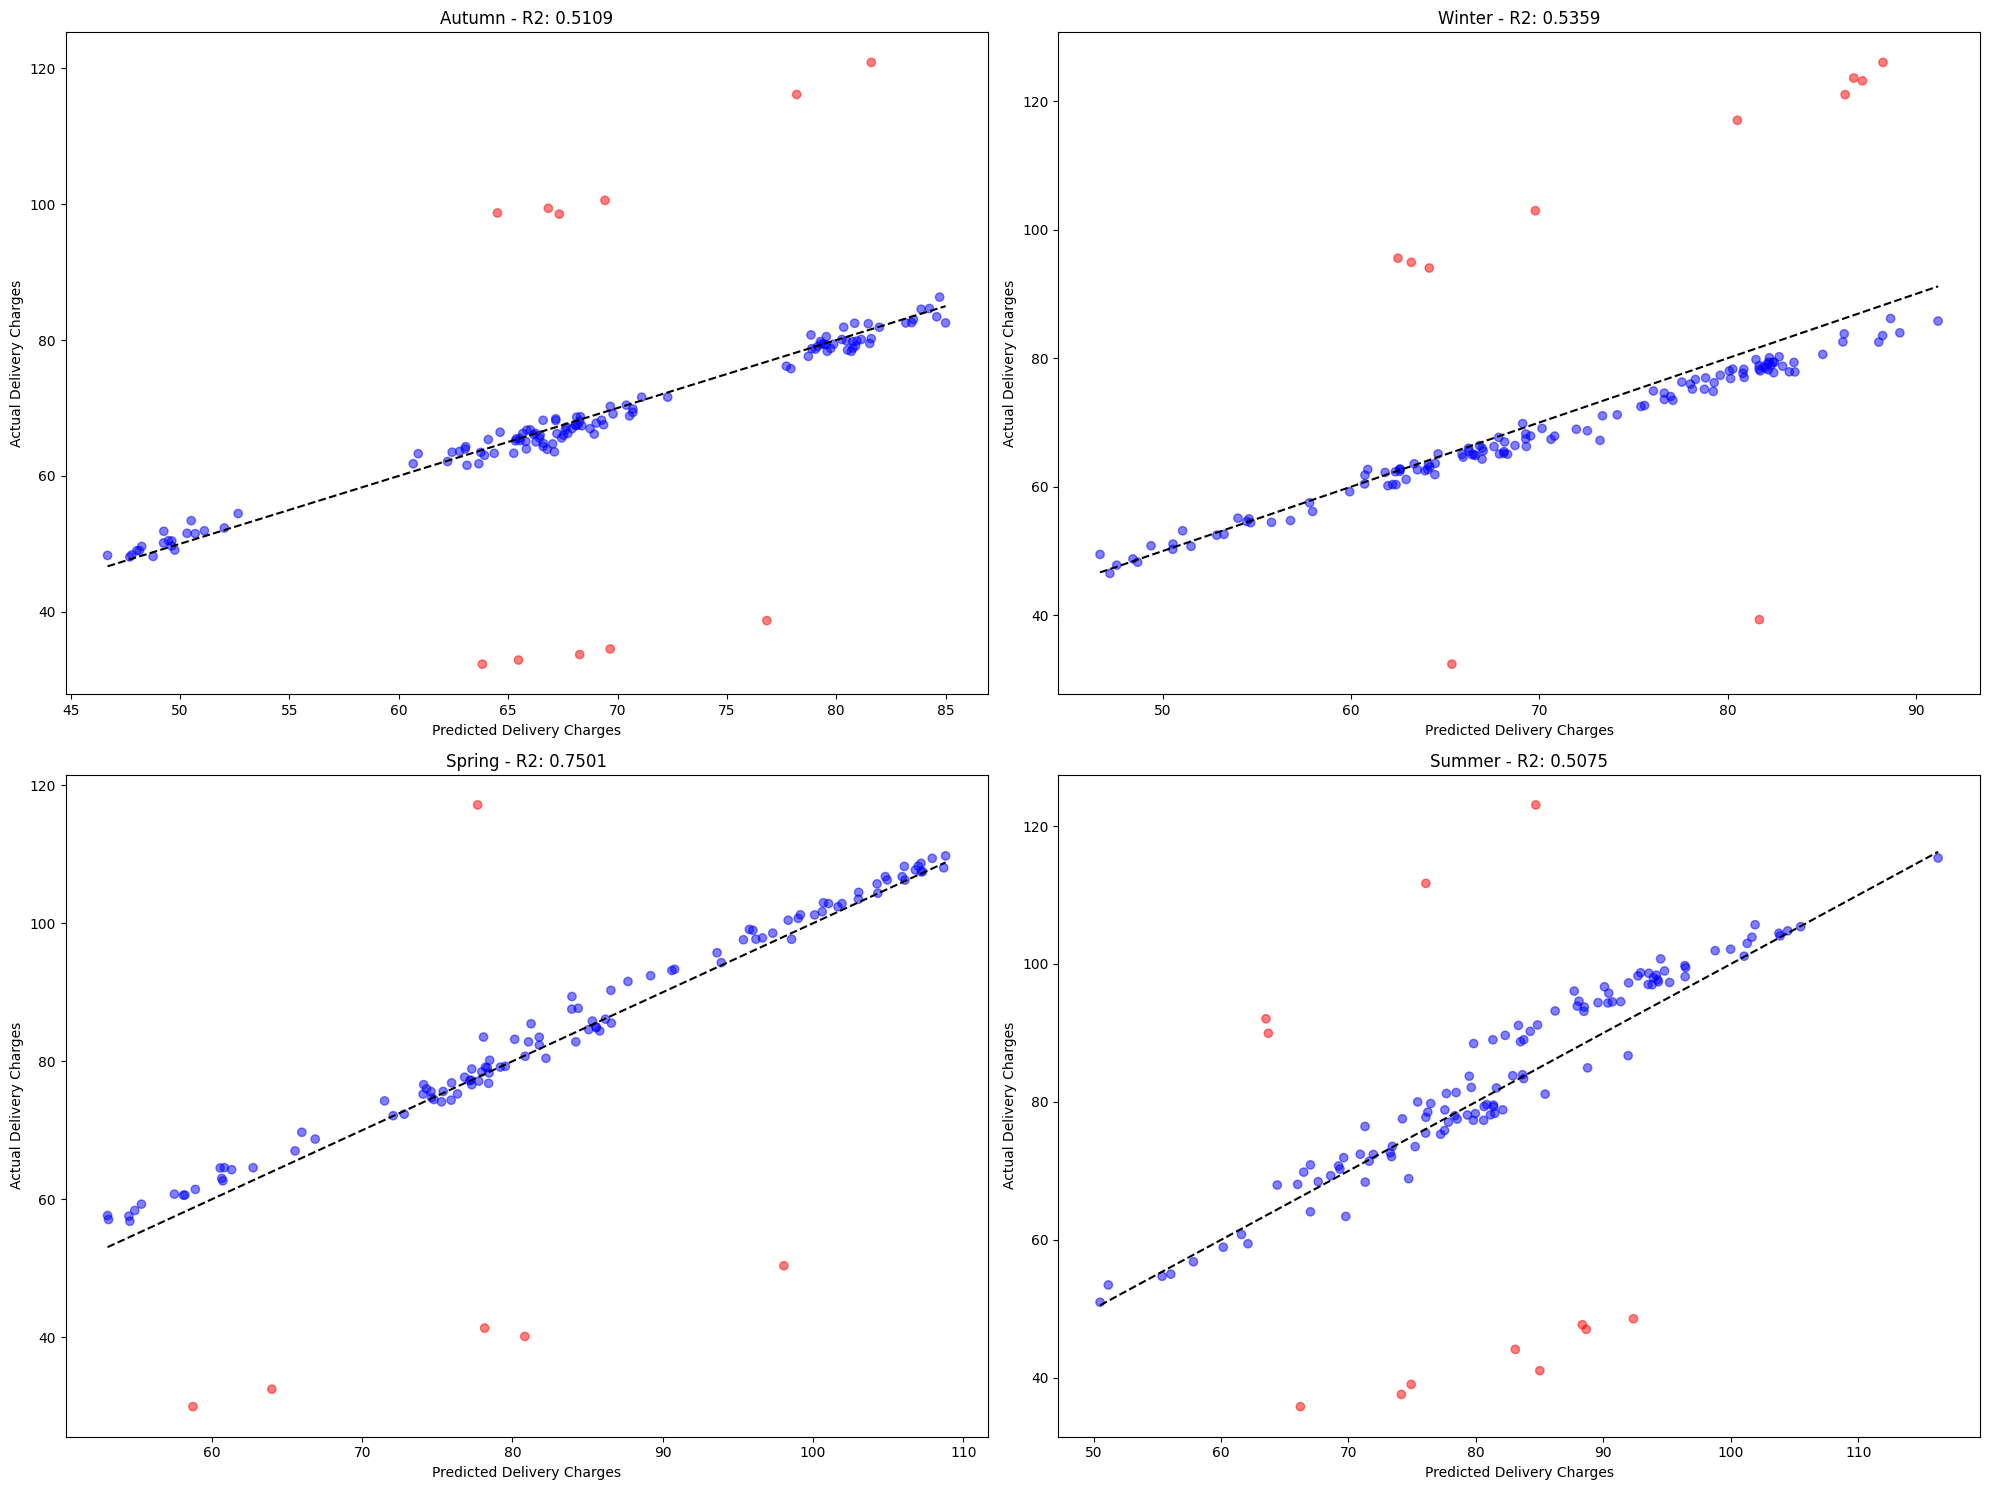


Original dataset shape: (500, 16)
Cleaned dataset shape: (460, 16)


In [730]:
outlier_df = outlier_data.copy()
# Prepare features
def prepare_features(df):
    return pd.DataFrame({
        'distance': df['distance_to_nearest_warehouse'],
        'expedited': df['is_expedited_delivery'].astype(int),
        'happy_customer': df['is_happy_customer'].astype(int)
    })

def train_model_and_get_residuals(season_data):
    X = prepare_features(season_data)
    y = season_data['delivery_charges']
    #Build linear regression model
    model = LinearRegression()
    model.fit(X, y)
    #Generate predictions
    predictions = model.predict(X)
    residuals = y - predictions
    r2 = r2_score(y, predictions)

    return model, residuals, r2, predictions


season_results = {}
all_actual = []
all_predictions = []

# Train models for each season
for season in outlier_df['season'].unique():
    #Get data for each season
    season_data = outlier_df[outlier_df['season'] == season]
    model, residuals, r2, predictions = train_model_and_get_residuals(season_data)
    #Save the evaluation for each season model
    season_results[season] = {
        'model': model,
        'residuals': residuals,
        'r2': r2,
        'predictions': predictions
    }
    print(f"R-squared for {season}: {r2:.4f}")

    # Append actual and predicted values for overall R² calculation
    all_actual.extend(season_data['delivery_charges'].values)
    all_predictions.extend(predictions)

# Calculate the overall R² score across all seasons
overall_r2 = r2_score(all_actual, all_predictions)

print(f"\nOverall R² score across all seasons: {overall_r2:.4f}")

# The 3� edit rule
def identify_outliers(residuals):
    threshold = 2 * np.std(residuals)
    return np.abs(residuals) > threshold

# Identify outliers for each season
outliers = pd.Series(False, index=outlier_df.index)
for season, results in season_results.items():
    season_mask = outlier_df['season'] == season
    season_outliers = identify_outliers(results['residuals'])
    outliers[season_mask] = season_outliers.values  # Use .values to align with the mask

# Print outlier summary
print(f"\nTotal outliers identified: {outliers.sum()}")
print(f"Percentage of outliers: {outliers.mean()*100:.2f}%")

# Plot for each season
plt.figure(figsize=(20, 15))
for i, (season, results) in enumerate(season_results.items(), 1):
    plt.subplot(2, 2, i)
    season_mask = outlier_df['season'] == season
    season_data = outlier_df[season_mask]

    plt.scatter(results['predictions'], season_data['delivery_charges'],
                c=['red' if o else 'blue' for o in outliers[season_mask]], alpha=0.5)
    plt.plot([min(results['predictions']), max(results['predictions'])],
             [min(results['predictions']), max(results['predictions'])], 'k--')
    plt.xlabel('Predicted Delivery Charges')
    plt.ylabel('Actual Delivery Charges')
    plt.title(f'{season} - R2: {results["r2"]:.4f}')

plt.tight_layout()
plt.show()

# Remove outliers and save the cleaned dataset
outlier_df_cleaned = outlier_df[~outliers]

print(f"\nOriginal dataset shape: {outlier_df.shape}")
print(f"Cleaned dataset shape: {outlier_df_cleaned.shape}")



Since our ensmble linear models worked well for missing and dirty data we decided to use the same model for our oulier detection , this model involves building individual models for each season to predict delivery charges based on the features, we calculate the residual which is the differnece between the true and predicted value this will help us identify the outliers in our data set,Residuals are often used to detect outliers in the data. Large residuals indicate that certain data points are not well-predicted by the model. These data points may be outliers, influential points, or points where the model is failing. To check if for outliers we use the 3 sigma rule , it is based on the properties of the normal distribution and suggests that almost all data in a normal distribution will fall within three standard deviations of the mean.Since deliver charge is normally distributed we choose this method , here instead of 3 standard deviations  we have used 2 standard deviations which sets a 95% confidence interval because this eliminated the right number of outliers and gave us a more accurate model.

T-statistic: 0.0000
P-value: 1.0000
The residuals do not have a statistically significant difference from zero.


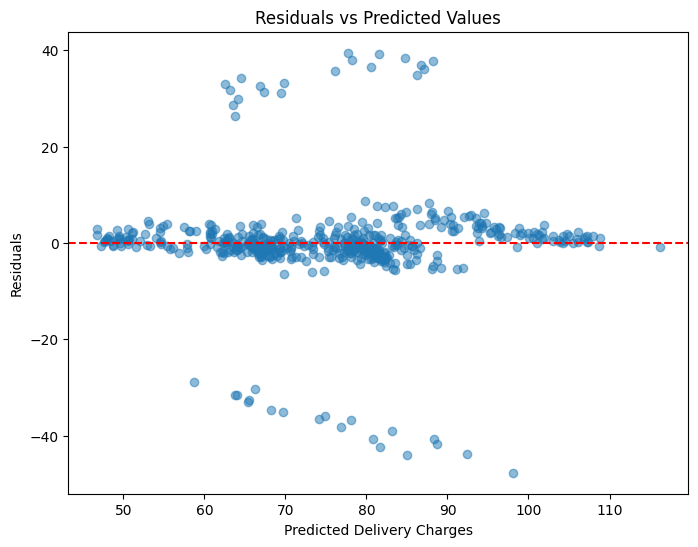

In [731]:

# Combine all residuals
all_residuals = np.concatenate([results['residuals'] for results in season_results.values()])

# Perform one-sample t-test on residuals
t_stat, p_value = stats.ttest_1samp(all_residuals, 0)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("The residuals have a statistically significant difference from zero.")
else:
    print("The residuals do not have a statistically significant difference from zero.")

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(all_predictions, all_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Delivery Charges')
plt.ylabel('Residuals')
plt.show()

T-statistic of 0.0000:
This means that the average of the residuals is exactly zero.

P-value of 1.0000:
The p-value represents the probability of observing the data under the null hypothesis. A p-value of 1.0000 means that we have the maximum possible probability of observing the data if the true mean of the residuals is zero.

The residuals are centered around zero: This is a good indication that your regression model is unbiased, meaning that, on average, your predictions are correct.

No systematic bias: Since the mean of the residuals is not significantly different from zero, it suggests that the model does not consistently overestimate or underestimate the delivery charges.

Model appropriateness: In general, this result implies that the model is doing a good job in terms of prediction, as residuals close to zero indicate that the model's errors are random rather than systematically biased.

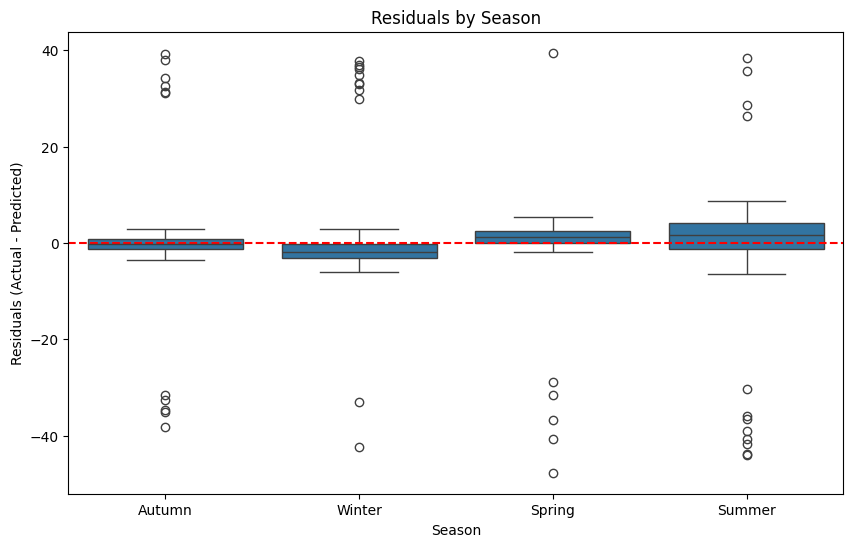

In [732]:
# Collect residuals into a dataframe
residuals_by_season = []

for season, results in season_results.items():
    season_residuals = pd.DataFrame({
        'season': season,
        'residuals': results['residuals']
    })
    residuals_by_season.append(season_residuals)

# Combine all seasons' residuals into one dataframe
residuals_df = pd.concat(residuals_by_season)

# Create a boxplot to analyze residuals by season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='residuals', data=residuals_df)
plt.title('Residuals by Season')
plt.ylabel('Residuals (Actual - Predicted)')
plt.xlabel('Season')
plt.axhline(0, color='red', linestyle='--')
plt.show()

Residuals by Season Boxplot: The boxplot visualizes the residuals (actual minus predicted values) for each season. The residuals are centered around zero across all seasons, meaning the model does not systematically overestimate or underestimate delivery charges. However, outliers are present, particularly in Winter and Spring, which suggests occasional large prediction errors for some orders.
The median of the residuals are to 0, indicating that the model does not consistently overestimate or underestimate the delivery charges for that season.

In [733]:
# Retrain the models on the cleaned dataset and check R-squared again
season_results_cleaned = {}

# Store the actual and predicted values across all seasons for overall R² calculation after removing outliers
all_actual_cleaned = []
all_predictions_cleaned = []

for season in outlier_df_cleaned['season'].unique():
    season_data_cleaned = outlier_df_cleaned[outlier_df_cleaned['season'] == season]
    model_cleaned, residuals_cleaned, r2_cleaned, predictions_cleaned = train_model_and_get_residuals(season_data_cleaned)

    season_results_cleaned[season] = {
        'model': model_cleaned,
        'residuals': residuals_cleaned,
        'r2': r2_cleaned,
        'predictions': predictions_cleaned
    }

    print(f"R-squared for {season} after removing outliers: {r2_cleaned:.4f}")

    # Append actual and predicted values for overall R² calculation (after removing outliers)
    all_actual_cleaned.extend(season_data_cleaned['delivery_charges'].values)
    all_predictions_cleaned.extend(predictions_cleaned)

# Calculate the overall R² score across all seasons after outlier removal
overall_r2_cleaned = r2_score(all_actual_cleaned, all_predictions_cleaned)

print(f"\nOverall R² score across all seasons after removing outliers: {overall_r2_cleaned:.4f}")


R-squared for Autumn after removing outliers: 0.9898
R-squared for Winter after removing outliers: 0.9904
R-squared for Spring after removing outliers: 0.9965
R-squared for Summer after removing outliers: 0.9947

Overall R² score across all seasons after removing outliers: 0.9956


R-Squared Results after Removing Outliers: The R-squared values for the model after removing outliers remain consistently high across all seasons, ranging from 0.9098 to 0.9947. The overall R-squared value across all seasons is 0.9956, indicating that the model explains 99.56% of the variance in delivery charges after outlier removal, suggesting a strong fit.

In [734]:
outlier_df_cleaned.to_csv('Group103_outlier_data_solution.csv', index=False)

# **Refrences**



*  Using pythons eval vs ast literal eval. https://stackoverflow.com/questions/15197673/using-pythons-eval-vs-ast-literal-eval
*  Chcek if float is close to any float stored in array. https://stackoverflow.com/questions/25962838/check-if-float-is-close-to-any-float-stored-in-array
* How to use numpy np linalg solve to solve over determined least square system.https://stackoverflow.com/questions/67496690/how-to-use-numpys-np-linalg-solve-to-solve-over-deteremined-least-square-system
* When jitter scatter. https://www.linkedin.com/pulse/when-jitter-scatter-adam-mccann/

* Understanding the seaborm stripplot in python.https://pieriantraining.com/understanding-the-seaborm-stripplot-in-python/

* Ensemble models how to make better predictions .https://aryanbajaj13.medium.com/ensemble-models-how-to-make-better-predictions-by-combining-multiple-models-with-python-codes-6ac54403414e

* How do I generate all permutations of a list. https://stackoverflow.com/questions/104420/how-do-i-generate-all-permutations-of-a-list

